# Visualización de Tablas

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dotenv import load_dotenv
import os
import sys
from pathlib import Path

load_dotenv()

AVES_ROOT = Path(os.environ['AVES_ROOT'])
EOD_PATH = AVES_ROOT / "data" / "external" / "EOD_STGO"
EOD_PATH

PosixPath('/home/egraells/resources/aves/data/external/EOD_STGO')

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from aves.data import eod
from aves.features.utils import normalize_rows, normalize_columns
from aves.config import setup_style

setup_style()

Leeremos la encuesta origen destino. Primero las personas. Le agregaremos dos atributos a la tabla:

* `Edad`: atributo cuantitativo definido como el año 2013 menos el año de nacimiento.
* `GrupoEtareo`: atributo ordinal definido como grupos de edad de 5 años. Se calcula a partir de `Edad` con la operación módulo.

In [4]:
personas = eod.read_people(EOD_PATH)
personas

Hogar   Persona  AnoNac    Sexo          Relacion  Viajes  \
0      100010  10001001    1958  Hombre  Jefe(a) de Hogar       2   
1      100010  10001002    1956   Mujer  Cónyuge o pareja       5   
2      100010  10001003    1982   Mujer       Hijo o Hija       0   
3      100020  10002001    1954  Hombre  Jefe(a) de Hogar       4   
4      100020  10002002    1961   Mujer  Cónyuge o pareja       2   
...       ...       ...     ...     ...               ...     ...   
60049  706791  70679101    1956   Mujer  Cónyuge o pareja       2   
60050  706791  70679102    1955  Hombre  Jefe(a) de Hogar       0   
60051  743813  74381301    1943  Hombre  Jefe(a) de Hogar       2   
60052  743813  74381302    1943   Mujer  Cónyuge o pareja       2   
60053  743823  74382301    1957  Hombre  Jefe(a) de Hogar       2   

      LicenciaConducir  PaseEscolar  AdultoMayor  Estudios  ...  \
0                    3            2            2       4.0  ...   
1                    1            2            2       5.0  ...   
2                    1            2            2       7.0  ...   
3                    3            2            2       4.0  ...   
4                    1            2            2       4.0  ...   
...                ...          ...          ...       ...  ...   
60049                1            2            2       4.0  ...   
60050                1            2            2       5.0  ...   
60051                1            2            2       5.0  ...   
60052                1            2            2       4.0  ...   
60053                1            2            2       5.0  ...   

                        TramoIngreso IngresoFinal TramoIngresoFinal  \
0      Entre 200.001 y 400.000 pesos       240000                 2   
1                                NaN            0                 0   
2      Entre 200.001 y 400.000 pesos       210845                 2   
3             Menos de 200.000 pesos       133000                 1   
4             Menos de 200.000 pesos       193000                 1   
...                              ...          ...               ...   
60049                            NaN            0                 0   
60050  Entre 200.001 y 400.000 pesos       396715                 2   
60051         Menos de 200.000 pesos       140369                 1   
60052         Menos de 200.000 pesos       177636                 1   
60053         Menos de 200.000 pesos       140007                 1   

       IngresoImputado  Factor_LaboralNormal  Factor_SabadoNormal  \
0                    0                   NaN                  NaN   
1                    0                   NaN                  NaN   
2                    2                   NaN                  NaN   
3                    0             169.50230                  NaN   
4                    0              43.26765                  NaN   
...                ...                   ...                  ...   
60049                0                   NaN                  NaN   
60050                2                   NaN                  NaN   
60051                2                   NaN                  NaN   
60052                2                   NaN                  NaN   
60053                2                   NaN                  NaN   

       Factor_DomingoNormal  Factor_LaboralEstival  Factor_FindesemanaEstival  \
0                 1668.2600                    NaN                        NaN   
1                  852.1137                    NaN                        NaN   
2                 1609.1630                    NaN                        NaN   
3                       NaN                    NaN                        NaN   
4                       NaN                    NaN                        NaN   
...                     ...                    ...                        ...   
60049              320.9519                    NaN                        NaN   
60050              320.9519                 

In [5]:
personas["Edad"] = 2013 - personas["AnoNac"]

personas["GrupoEtareo"] = personas["Edad"] - (personas["Edad"] % 5)
personas["GrupoEtareo"].value_counts()


GrupoEtareo
20     5348
25     4571
15     4472
50     4248
40     4173
45     4008
30     4004
10     3898
35     3769
5      3694
55     3601
60     2998
0      2953
65     2775
70     2128
75     1423
80     1111
85      590
90      222
95       58
100       9
105       1
Name: count, dtype: int64

Procedemos a leer las tablas restantes y a crear una tabla con toda la información.

In [6]:
hogares = eod.read_homes(EOD_PATH)
hogares

Hogar                  Sector  Zona       Comuna    DirCoordX  \
0      100010  Extensión Sur-Poniente   786         BUIN  335180.8019   
1      100020  Extensión Sur-Poniente   785         BUIN  338410.2114   
2      100030  Extensión Sur-Poniente   791         BUIN  327863.8248   
3      100041  Extensión Sur-Poniente   791         BUIN  327864.0000   
4      100052  Extensión Sur-Poniente   783         BUIN  338480.8152   
...       ...                     ...   ...          ...          ...   
18259  700990  Extensión Sur-Poniente   785         BUIN  339104.1011   
18260  706781                Poniente    69  CERRO NAVIA  338539.1741   
18261  706791                Poniente    69  CERRO NAVIA  338563.2201   
18262  743813                     Sur   244    LA GRANJA  349410.2812   
18263  743823                     Sur   235    LA GRANJA  349370.5635   

         DirCoordY       Fecha    DiaAsig  TipoDia  Temporada  ...  NumVeh  \
0      6266420.975  14-04-2013    domingo        2          1  ...       1   
1      6265607.141  10-04-2013  miércoles        1          1  ...       1   
2      6257800.086  23-08-2013    viernes        1          1  ...       0   
3      6257800.000  23-08-2013    viernes        1          1  ...       0   
4      6267296.941  08-08-2013     jueves        1          1  ...       0   
...            ...         ...        ...      ...        ...  ...     ...   
18259  6263063.925  24-11-2013    domingo        2          1  ...       0   
18260  6299539.203  24-11-2013    domingo        2          1  ...       0   
18261  6299580.118  24-11-2013    domingo        2          1  ...       0   
18262  6289668.962  24-11-2013    domingo        2          1  ...       0   
18263  6289594.916  24-11-2013    domingo        2          1  ...       0   

       NumBicAdulto  NumBicNino  Propiedad  MontoDiv  ImputadoDiv  MontoArr  \
0                 1           0          2   53000.0            0    100000   
1                 3           0          1       NaN            0    120000   
2                 0           0          3       NaN            0     70000   
3                 1           0          1       NaN            0     80000   
4                 0           0          1       NaN            0    117771   
...             ...         ...        ...       ...          ...       ...   
18259             1           1          1       NaN            0    100000   
18260             2           2          1       NaN            0    140000   
18261             0           0          1       NaN            0    200000   
18262             0           0          1       NaN            0     80000   
18263             1           0          1       NaN            0     80000   

       ImputadoArr  IngresoHogar  FactorHogar  
0                0        450845   136.393738  
1                0       1019369    73.843597  
2                0         80000   180.722809  
3                0        559259   150.379059  
4                1        710309   122.001518  
...            ...           ...          ...  
18259            0        300000    75.526031  
18260            0        695186   174.348663  
18261            0        396715    71.358963  
18262            0        318005    68.410446  
18263            0        140007   231.671707  

[18264 rows x 21 columns]

In [7]:
viajes = eod.read_trips(EOD_PATH)
viajes

Hogar   Persona       Viaje  Etapas ComunaOrigen ComunaDestino  \
0       173431  17343102  1734310202       1        Maipú         Maipú   
1       173441  17344101  1734410101       2        Maipú    Las Condes   
2       173441  17344101  1734410102       2   Las Condes         Maipú   
3       173441  17344103  1734410301       2        Maipú         Ñuñoa   
4       173441  17344103  1734410302       2        Ñuñoa         Maipú   
...        ...       ...         ...     ...          ...           ...   
113584  706791  70679101  7067910102       1  Cerro Navia   Cerro Navia   
113585  743813  74381301  7438130101       1    La Granja     La Granja   
113586  743813  74381301  7438130102       1    La Granja     La Granja   
113587  743813  74381302  7438130201       1    La Granja     La Granja   
113588  743813  74381302  7438130202       1    La Granja     La Granja   

       SectorOrigen SectorDestino  ZonaOrigen  ZonaDestino  ...  \
0          Poniente      Poniente         400          407  ...   
1          Poniente       Oriente         407          307  ...   
2           Oriente      Poniente         307          407  ...   
3          Poniente       Oriente         407          437  ...   
4           Oriente      Poniente         437          407  ...   
...             ...           ...         ...          ...  ...   
113584     Poniente      Poniente          73           69  ...   
113585          Sur           Sur         244          235  ...   
113586          Sur           Sur         235          244  ...   
113587          Sur           Sur         244          235  ...   
113588          Sur           Sur         235          244  ...   

        FactorDomingoNormal  FactorLaboralEstival  FactorFindesemanaEstival  \
0                       NaN                   NaN                       NaN   
1                       NaN                   NaN                       NaN   
2                       NaN                   NaN                       NaN   
3                       NaN                   NaN                       NaN   
4                       NaN                   NaN                       NaN   
...                     ...                   ...                       ...   
113584             1.482104                   NaN                       NaN   
113585             1.482104                   NaN                       NaN   
113586             1.482104                   NaN                       NaN   
113587             1.482104                   NaN                       NaN   
113588             1.482104                   NaN                       NaN   

        CodigoTiempo ModoDifusion  DistEuclidiana DistManhattan Imputada  \
0                0.0         Bip!            5387          7608        0   
1                0.0         Bip!           18841         26100        0   
2                0.0         Bip!           18841         26100        0   
3                0.0         Bip!           13392         17589        0   
4                0.0         Bip!           13392         17589        0   
...              ...          ...             ...           ...      ...   
113584           NaN     Caminata             122           172        0   
113585           NaN     Caminata             680           811        0   
113586           NaN     Caminata             680           811        0   
113587           NaN     Caminata             680           811        0   
113588           NaN     Caminata             680           811        0   

        TipoDia  FactorExpansion  
0       Laboral         1.000000  
1       Laboral         1.127220  
2       Laboral         1.127220  
3       Laboral         1.127220  
4       Laboral         1.052764  
...         ...              ...  
113584  Domingo         1.482104  
113585  Domingo         1.482104  
113586  Domingo         1.482104  
113587  Domingo         1.482104  
113588  Domingo         1.482104  

[89775 rows x 41 col

In [8]:
tabla_completa = (viajes.merge(personas)).merge(hogares.drop("TipoDia", axis=1))

In [9]:
tabla_completa.sample(5)

Hogar   Persona       Viaje  Etapas         ComunaOrigen  \
15840  134871  13487102  1348710203       1           La Florida   
68428  236970  23697002  2369700201       2            Quilicura   
47348  193471  19347103  1934710301       1                Ñuñoa   
49898  198470  19847002  1984700206       1  Pedro Aguirre Cerda   
26081  153151  15315102  1531510202       1             Santiago   

             ComunaDestino SectorOrigen SectorDestino  ZonaOrigen  \
15840           La Florida  Sur-Oriente   Sur-Oriente         193   
68428        Quinta Normal        Norte      Poniente         544   
47348                Ñuñoa      Oriente       Oriente         436   
49898  Pedro Aguirre Cerda     Poniente      Poniente         464   
26081               Colina       Centro         Norte          16   

       ZonaDestino  ...  NumVeh  NumBicAdulto  NumBicNino  Propiedad  \
15840          230  ...       2             3           1          3   
68428          571  ...       1             0           0          2   
47348          436  ...       1             1           1          1   
49898          460  ...       0             1           1          1   
26081          738  ...       0             2           0          1   

       MontoDiv  ImputadoDiv MontoArr ImputadoArr IngresoHogar  FactorHogar  
15840       NaN            0   180000           0       879317   253.914658  
68428  227415.0            1   194046           1       976503    58.980179  
47348       NaN            0   258760           1      1042000    64.857040  
49898       NaN            0   100000           0       420000   148.935089  
26081       NaN            0    90000           0       407246    22.431303  

[5 rows x 99 columns]

In [10]:
tabla_completa[['FactorExpansion', 'FactorPersona']].describe()

FactorExpansion  FactorPersona
count     89774.000000    89775.00000
mean          1.205620      117.84197
std           0.224139      202.73535
min           0.817907        0.52032
25%           1.000000       30.66064
50%           1.127220       57.47303
75%           1.482104      119.58056
max           1.505878     3112.45044

En esta clase consideraremos los factores de expansión de la encuesta, que son necesarios para que los análisis sean representativos de la población.

El peso o representatividad de un viaje es la multiplicación de su factor de expansión (_qué tan frecuente ese tipo de viaje es_) y el del factor de expansión de cada persona (_qué tan representativa de otras personas es_). Además hay factores de expansión para días de semana, sábado, domingo, y periodos estival (vacaciones) y normal.

Trabajaremos con los periodos normales.

In [11]:
viajes.groupby('TipoDia')['FactorExpansion'].describe()

count      mean       std       min       25%       50%  \
TipoDia                                                                         
Domingo              4867.0  1.285977  0.215361  1.000000  1.052764  1.482104   
FindesemanaEstival   3809.0  1.244856  0.219565  1.000000  1.000000  1.143880   
Laboral             62828.0  1.192476  0.225988  0.817907  1.000000  1.127220   
LaboralEstival      11629.0  1.200153  0.210438  1.000000  1.000000  1.127220   
No Definido             0.0       NaN       NaN       NaN       NaN       NaN   
Sábado               6641.0  1.258145  0.216213  1.000000  1.000000  1.143880   

                         75%       max  
TipoDia                                 
Domingo             1.482104  1.482104  
FindesemanaEstival  1.482104  1.482104  
Laboral             1.482104  1.505878  
LaboralEstival      1.482104  1.482104  
No Definido              NaN       NaN  
Sábado              1.482104  1.482104

In [12]:
tabla_completa["Peso"] = tabla_completa["FactorExpansion"] * tabla_completa["FactorPersona"]
tabla_completa.groupby('TipoDia')['Peso'].describe()

count        mean         std       min        25%  \
TipoDia                                                                    
Domingo              4867.0  159.325254  300.647919  0.520320  37.658590   
FindesemanaEstival   3809.0  133.529586  226.110385  0.711779  37.260590   
Laboral             62828.0  147.489865  262.925477  0.431389  35.957344   
LaboralEstival      11629.0  126.966698  226.336719  0.520320  33.894891   
No Definido             0.0         NaN         NaN       NaN        NaN   
Sábado               6641.0  127.076806  189.190694  0.520320  34.514954   

                          50%         75%          max  
TipoDia                                                 
Domingo             71.904213  150.835286  4066.176680  
FindesemanaEstival  68.552790  130.011667  2292.901778  
Laboral             68.275636  146.843572  4612.974967  
LaboralEstival      63.150817  126.003362  3138.796483  
No Definido               NaN         NaN          NaN  
Sábado              67.160406  142.909190  2868.461773

## ¿Cuál es la distribución de uso de modo de transporte en viajes al trabajo?

Una pregunta relevante siempre. En tiempos de COVID-19 está en debate si el uso de transporte público es un foco de contagio. Entender la distribución de usos de transporte por comuna es importante para la definición de estrategias de desconfinamiento.

Primero, debemos calcular la distribución de uso de modos de transporte por comuna. 

In [13]:
tabla_completa['Proposito'].value_counts(normalize=True)

Proposito
volver a casa                   0.459821
Al trabajo                      0.184252
Al estudio                      0.076581
De compras                      0.069430
Trámites                        0.041883
Buscar o Dejar a alguien        0.035300
Visitar a alguien               0.033317
Recreación                      0.024551
De salud                        0.022935
Por trabajo                     0.016675
Otra actividad (especifique)    0.016363
Por estudio                     0.010660
Comer o Tomar algo              0.004823
Buscar o dejar algo             0.003409
Name: proportion, dtype: float64

In [14]:
total_viajes = (
    tabla_completa.groupby("Proposito")["Peso"]
    .sum()
    .astype(int)
    .sort_values(ascending=False)
)

total_viajes / total_viajes.sum()

Proposito
volver a casa                   0.460841
Al trabajo                      0.172368
De compras                      0.076918
Al estudio                      0.072500
Buscar o Dejar a alguien        0.039659
Trámites                        0.038584
Visitar a alguien               0.033710
Recreación                      0.028046
Por trabajo                     0.021761
De salud                        0.020044
Otra actividad (especifique)    0.017429
Por estudio                     0.008048
Comer o Tomar algo              0.006755
Buscar o dejar algo             0.003338
Name: Peso, dtype: float64

In [15]:
tabla_completa['ModoDifusion'].value_counts(normalize=True)

ModoDifusion
Bip!                    0.352270
Auto                    0.281415
Caminata                0.151579
Otros                   0.089457
Taxi Colectivo          0.038095
Bicicleta               0.031980
Bip! - Otros Público    0.025519
Taxi                    0.017989
Bip! - Otros Privado    0.011696
Name: proportion, dtype: float64

In [16]:
modo_comuna = (
    tabla_completa[tabla_completa["Proposito"] == "Al trabajo"]
    .drop_duplicates(subset='Persona', keep='first')
    .groupby(["Comuna", "ModoDifusion"])
    ["Peso"].sum()
    .unstack(fill_value=0)
)

modo_comuna

ModoDifusion                 Auto    Bicicleta          Bip!  \
Comuna                                                         
BUIN                  1824.105716  1826.723721      0.000000   
CALERA DE TANGO       1971.629854   621.771214      0.000000   
CERRILLOS             9703.874003   520.033648   6511.663710   
CERRO NAVIA          10800.115134  1402.511578  20041.611448   
COLINA                8078.890875   456.088920      0.000000   
CONCHALI             12102.803898   428.957086  19952.319996   
EL BOSQUE            20587.535364   965.125366  18598.992850   
EL MONTE              2938.497080   792.299536     55.245320   
ESTACION CENTRAL     12205.617216  4848.738520  13695.624410   
HUECHURABA           11565.898377   688.246779  10050.229087   
INDEPENDENCIA         8788.489817  1590.596602   7563.961092   
ISLA DE MAIPO         1801.248751   909.779931      0.000000   
LA CISTERNA           7322.559135  1685.290999   8911.857825   
LA FLORIDA           53420.300240  5275.190745  65905.645488   
LA GRANJA             9892.253237   630.525464  24937.296265   
LA PINTANA            9925.097672  3125.439485  41004.722839   
LA REINA             19943.094406  1417.330127  14630.509705   
LAMPA                 5523.134680  3043.916026      0.000000   
LAS CONDES           56866.914406  4652.448165  26620.018292   
LO BARNECHEA         22134.939798   431.615825   6395.374716   
LO ESPEJO            11337.981985   722.310203   9908.653282   
LO PRADO              6512.546785   227.130610  21945.251172   
MACUL                16135.136806  2072.076356  13160.618665   
MAIPU                55905.813837  4390.498535  72475.092230   
MELIPILLA             5746.336467  1002.822736      0.000000   
PADRE HURTADO         2705.371984   488.230218    323.207139   
PEDRO AGUIRRE CERDA  17390.932228   846.117715  11781.482139   
PEÑAFLOR              5777.033338  1881.832373      0.000000   
PEÑALOLEN            33750.084264  1870.628205  28035.325746   
PIRQUE                3270.106920   146.633283     46.494453   
PROVIDENCIA          30233.884339  4293.031761  12448.997765   
PUDAHUEL             16578.734468  1386.486212  39686.056825   
PUENTE ALTO          34846.995832  5578.612499  75844.071518   
QUILICURA            15291.891660  6894.124106  31014.642702   
QUINTA NORMAL         7864.989427   761.843822  11184.090447   
RECOLETA             19988.540113  3724.838946  22166.363119   
RENCA                23034.246849  1869.894660  22962.703579   
SAN BERNARDO         22241.476670  6392.313489  18767.340131   
SAN JOAQUIN           9814.180904  2809.058490  12751.159367   
SAN MIGUEL           12360.190940   410.109555  12591.036576   
SAN RAMON            10612.645282  1500.527865  12939.129069   
SANTIAGO             35124.115120  5917.810644  46787.911884   
TALAGANTE             2809.105243   785.539891      0.000000   
VITACURA             19329.855434   542.015347   6559.427179   
ÑUÑOA                32643.548553  7701.879720  28738.674425   

ModoDifusion         Bip! - Otros Privado  Bip! - Otros Público      Caminata  \
Comuna                                                                          
BUIN                             0.000000            702.144519   1467.554158   
CALERA DE TANGO                 16.158820            493.521766   1161.677464   
CERRILLOS                       87.431490             40.535112    646.196849   
CERRO NAVIA                   1263.770440            302.395580    633.987394   
COLINA                           0.000000           5575.272880   2026.453935   
CONCHALI                         0.000000           1967.303479   1815.860105   
EL BOSQUE                     1301.345118           1276.539888   2571.384947   
EL MONTE                         0.000000            731.777155    415.906628   
ESTACION CENTRAL               174.581208            201.299562   2097.953896   
HUECHURABA                     161.539244            114.507320   1220.395073   
INDEPENDENCIA      

Veamos esta tabla como un gráfico que nos permita comparar la distribución por comunas.

<Axes: xlabel='Comuna'>

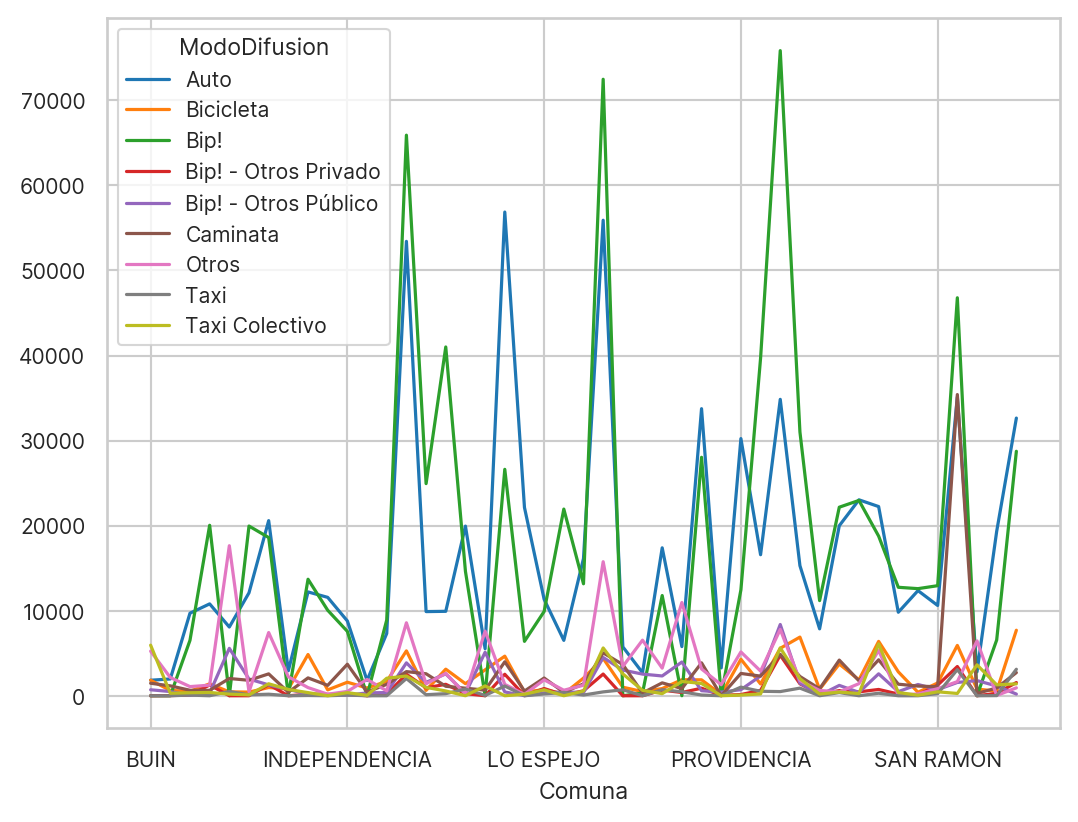

In [17]:
modo_comuna.plot()

<Axes: xlabel='Comuna'>

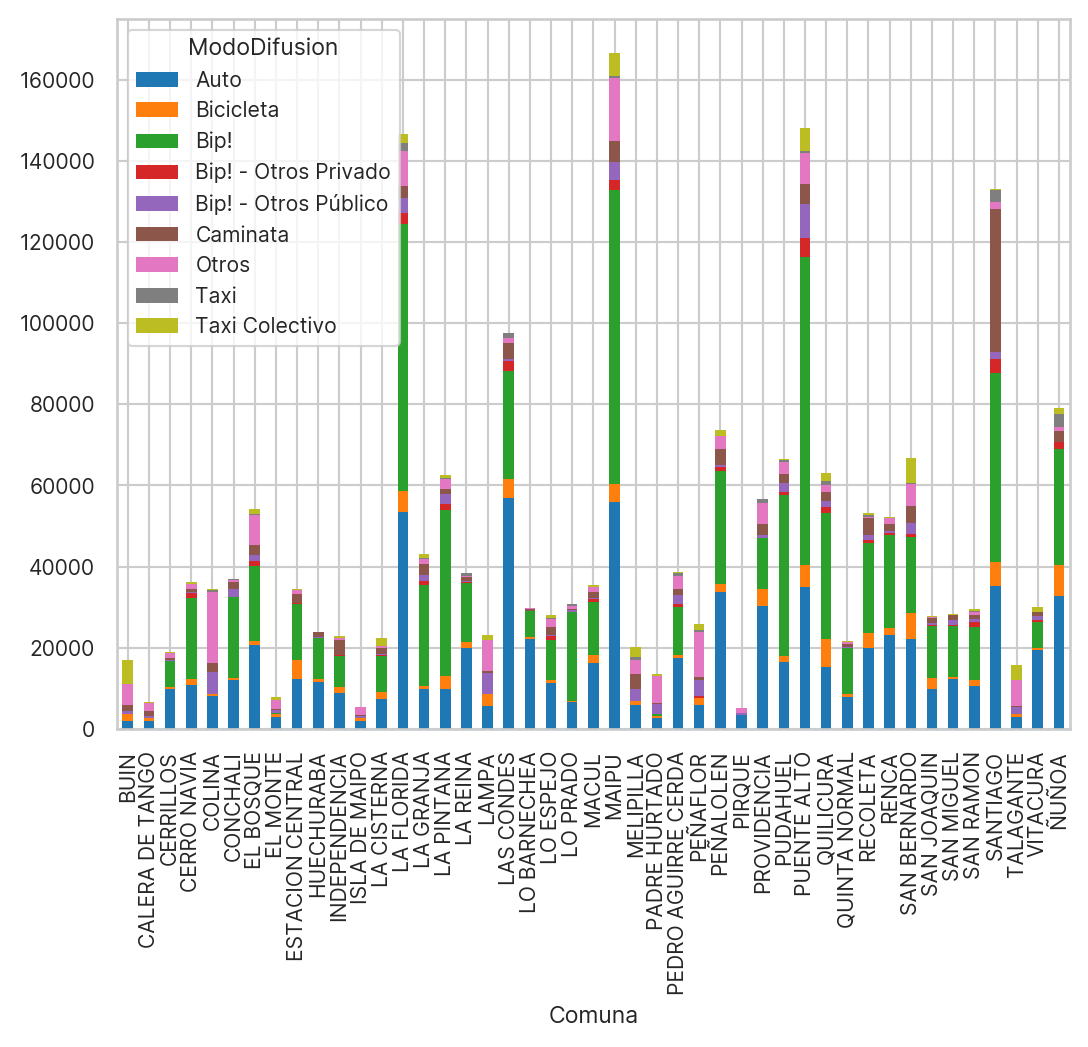

In [18]:
modo_comuna.plot(kind='bar', linewidth=0, stacked=True)

<Axes: ylabel='Comuna'>

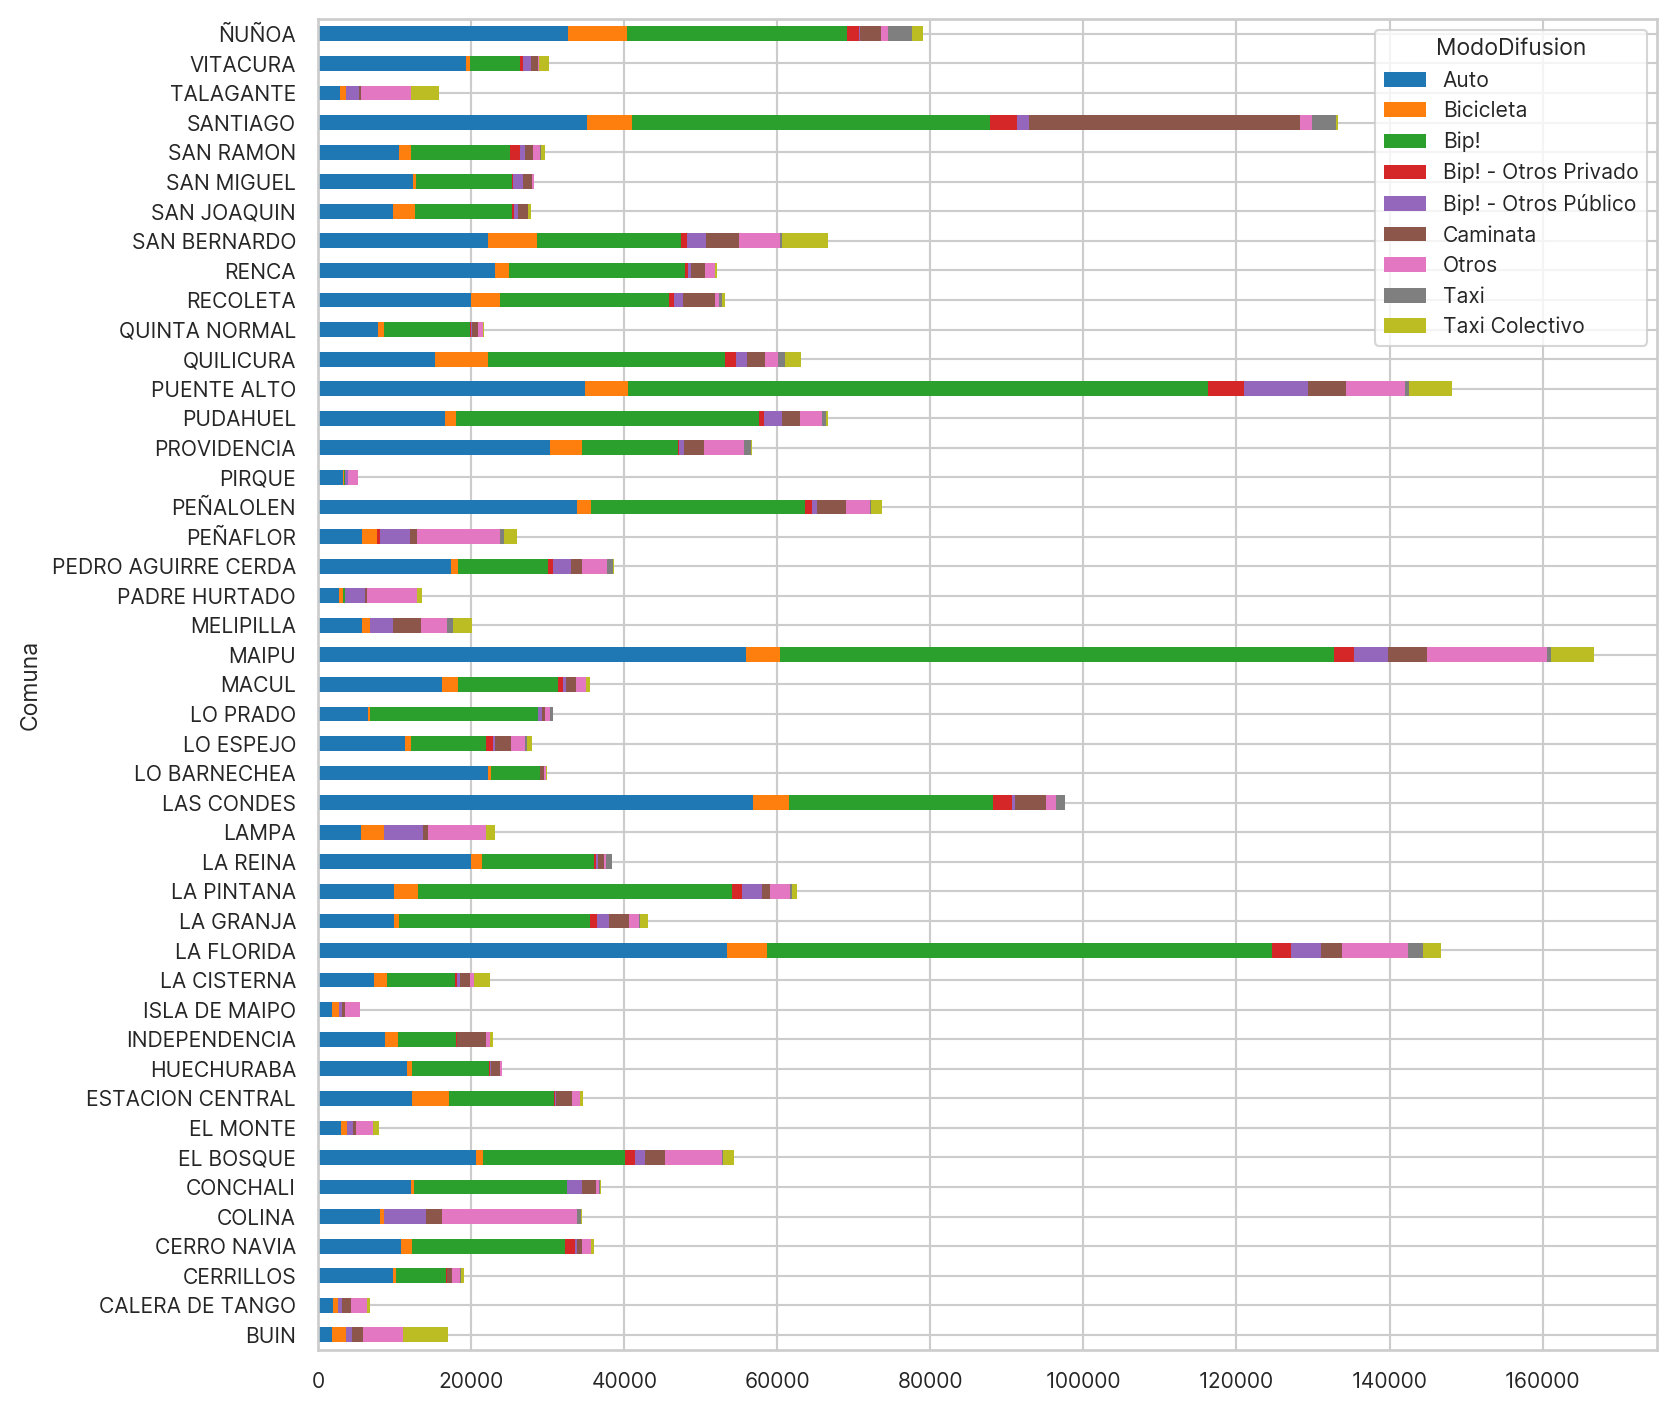

In [19]:
modo_comuna.plot(kind='barh', linewidth=0, stacked=True, figsize=(9, 9))

Text(0, 0.5, 'Cantidad de Viajes')

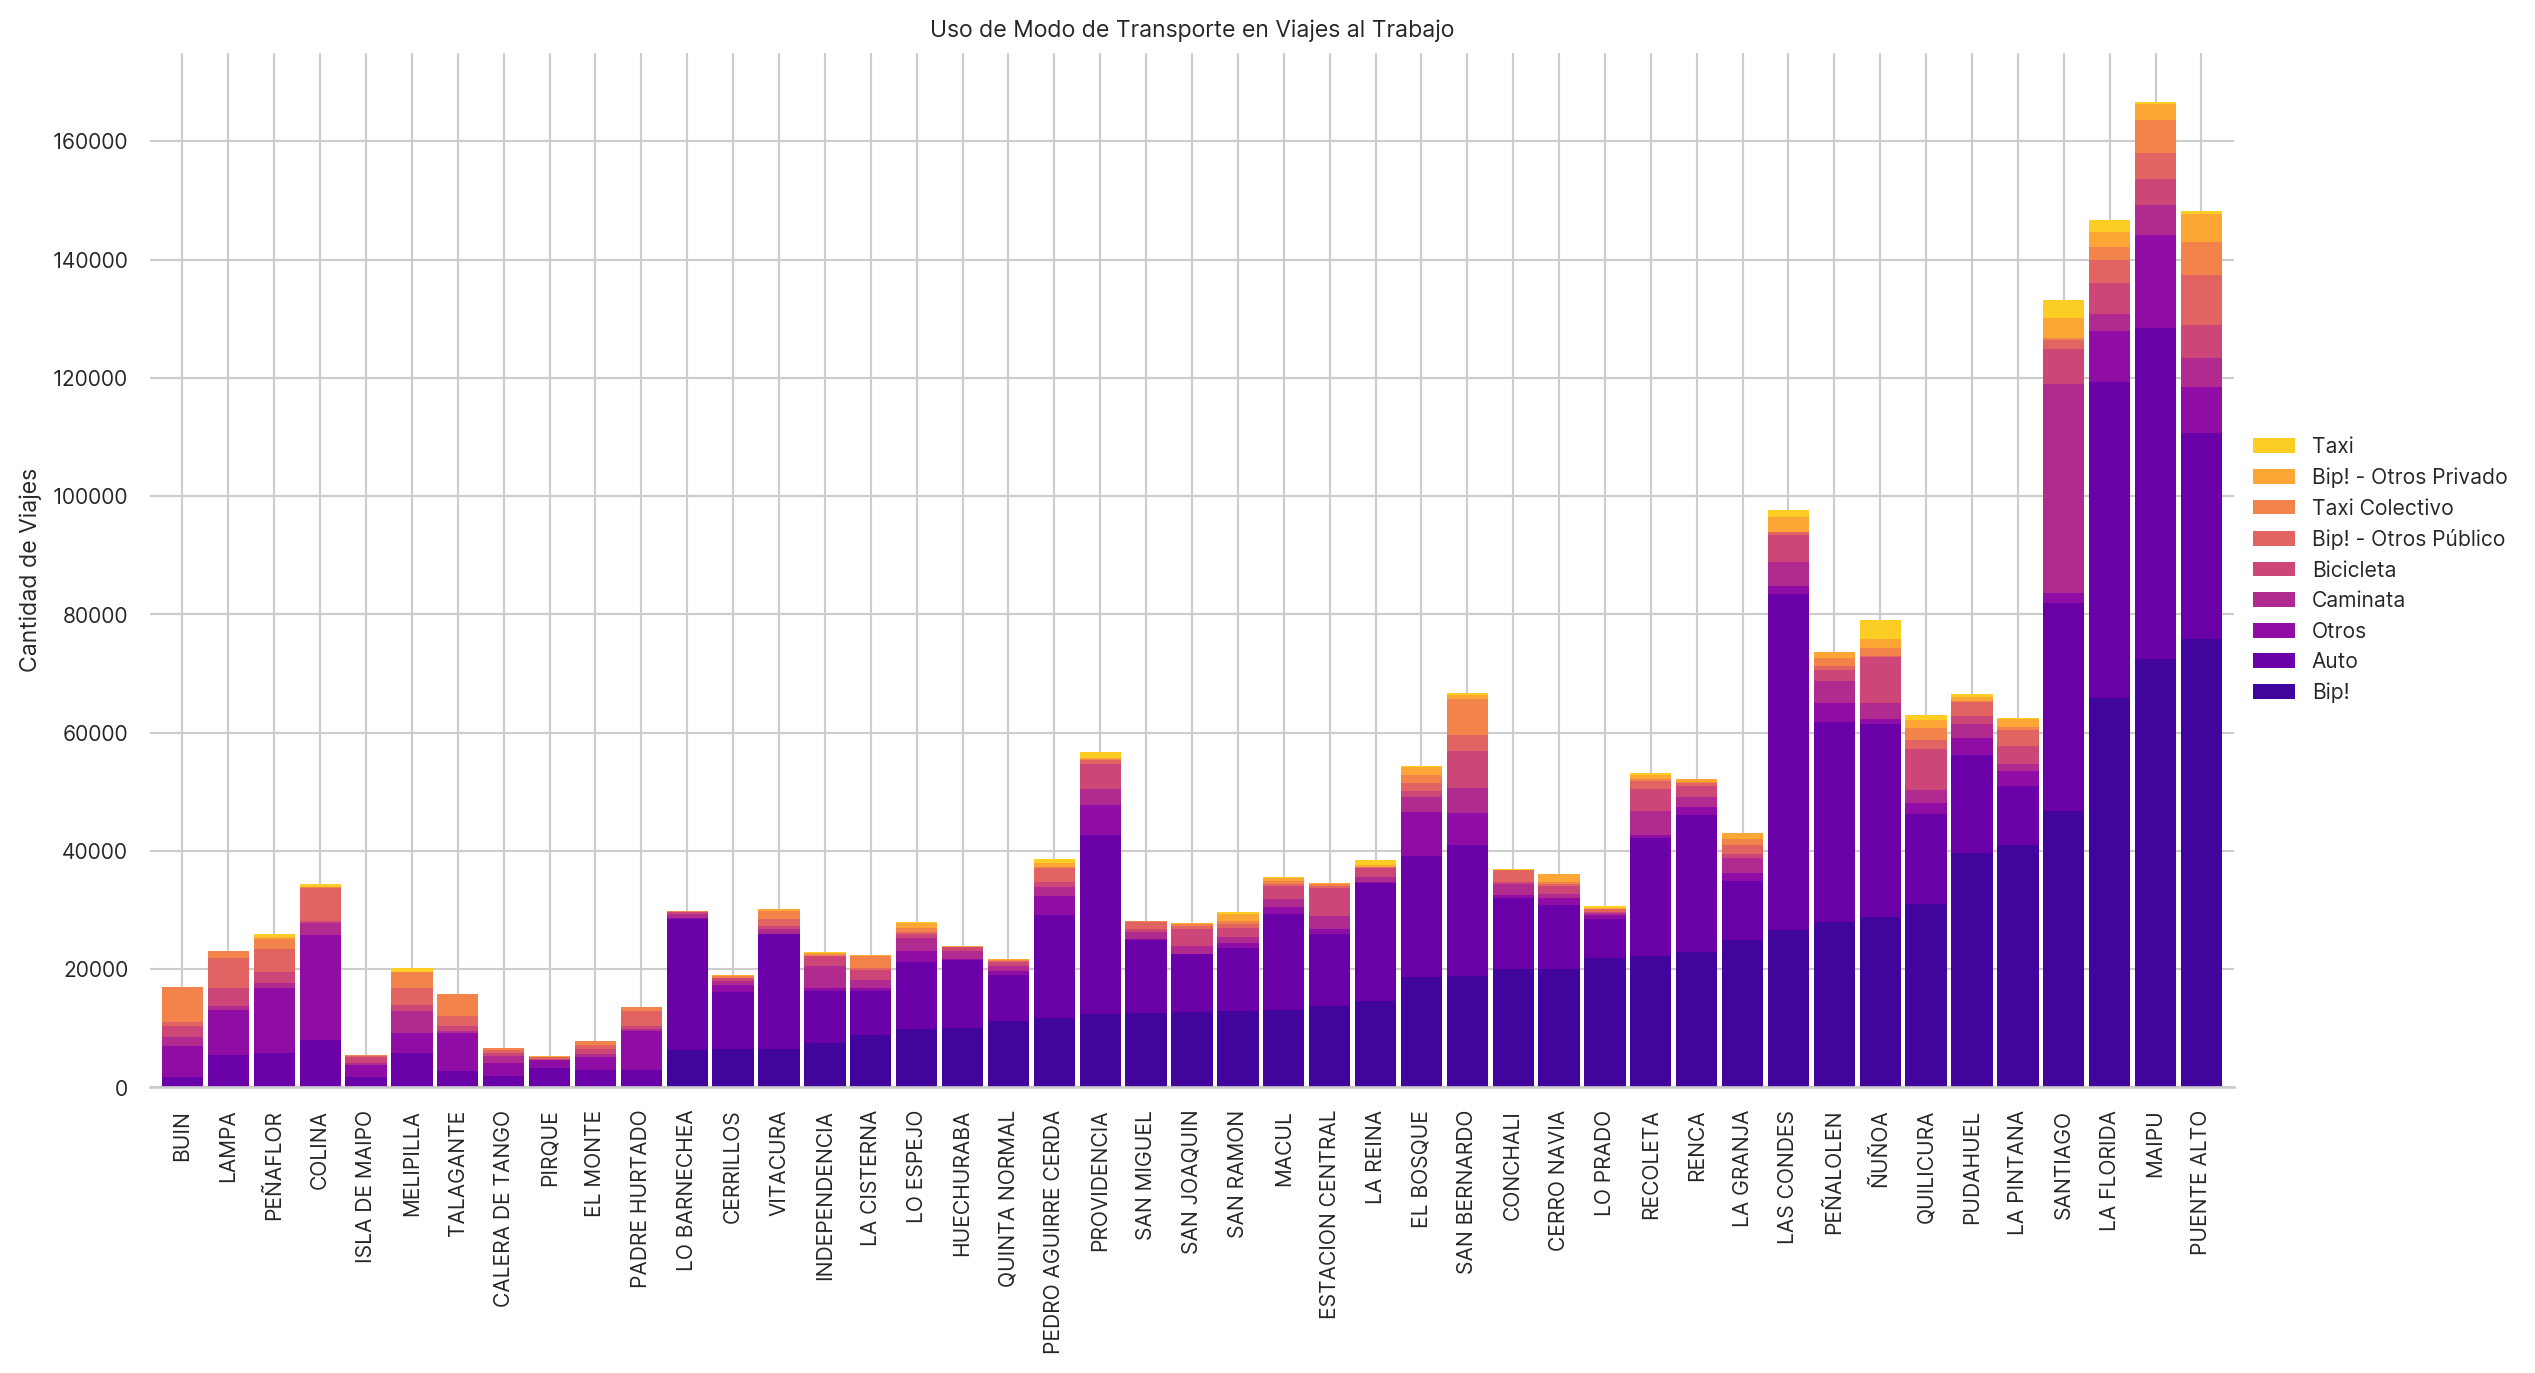

In [20]:
from aves.visualization.tables import barchart

fig, ax = plt.subplots(figsize=(14, 7))

barchart(
    ax, modo_comuna, stacked=True, sort_categories=True, sort_items=True, 
)

ax.set_title("Uso de Modo de Transporte en Viajes al Trabajo")
ax.set_xlabel("")
ax.set_ylabel("Cantidad de Viajes")


¡Es un gráfico interesante! Sin embargo está complejo, ya que cuesta diferenciar y comparar las distintas categorías. Creemos una categorización más sencilla que nos permita comparar mejor:

In [21]:
tabla_completa["ModoAgregado"] = tabla_completa["ModoDifusion"].map(
    {
        "Taxi": "Taxi",
        "Bip! - Otros Privado": "Público",
        "Bip!": "Público",
        "Bip! - Otros Público": "Público",
        "Taxi Colectivo": "Taxi",
        "Bicicleta": "Activo",
        "Caminata": "Activo",
        "Auto": "Auto",
        "Otros": "Otros",
    }
)

modo_comuna = (
    tabla_completa[tabla_completa["Proposito"] == "Al trabajo"]
    .drop_duplicates(subset=['Persona'], keep='first')
    .groupby(["Comuna", "ModoAgregado"])
    ['Peso'].sum()
    .unstack(fill_value=0)
)

modo_comuna


ModoAgregado               Activo          Auto        Otros       Público  \
Comuna                                                                       
BUIN                  3294.277879   1824.105716   5239.91868    702.144519   
CALERA DE TANGO       1783.448677   1971.629854   2145.95420    509.680586   
CERRILLOS             1166.230497   9703.874003   1074.40780   6639.630312   
CERRO NAVIA           2036.498972  10800.115134   1244.83879  21607.777468   
COLINA                2482.542855   8078.890875  17639.43572   5575.272880   
CONCHALI              2244.817190  12102.803898    467.36618  21919.623474   
EL BOSQUE             3536.510313  20587.535364   7429.41043  21176.877856   
EL MONTE              1208.206163   2938.497080   2231.74593    787.022475   
ESTACION CENTRAL      6946.692416  12205.617216    958.13213  14071.505180   
HUECHURABA            1908.641852  11565.898377    180.32683  10326.275651   
INDEPENDENCIA         5294.755253   8788.489817    509.68774   7788.995851   
ISLA DE MAIPO         1347.719049   1801.248751   1910.97973    336.975298   
LA CISTERNA           3028.711575   7322.559135    579.13113   9452.657194   
LA FLORIDA            8113.066458  53420.300240   8577.59037  72306.930551   
LA GRANJA             3215.388255   9892.253237   1407.95465  27448.264830   
LA PINTANA            4237.981778   9925.097672   2622.34419  44924.639160   
LA REINA              2306.525371  19943.094406    191.41646  15140.527667   
LAMPA                 3704.367824   5523.134680   7597.35910   5115.003980   
LAS CONDES            8643.256841  56866.914406   1335.79862  29592.516337   
LO BARNECHEA           981.723394  22134.939798    163.53153   6420.538244   
LO ESPEJO             2805.797212  11337.981985   1869.09205  11071.416920   
LO PRADO               632.778207   6512.546785    647.94260  22504.633361   
MACUL                 3466.256289  16135.136806   1232.22605  14105.896455   
MAIPU                 9428.927291  55905.813837  15757.40082  79519.696698   
MELIPILLA             4669.167537   5746.336467   3447.23885   3014.718233   
PADRE HURTADO          808.983682   2705.371984   6534.92613   2867.864884   
PEDRO AGUIRRE CERDA   2362.505681  17390.932228   3241.15193  14765.199169   
PEÑAFLOR              2726.864528   5777.033338  10957.27301   4345.393980   
PEÑALOLEN             5738.666296  33750.084264   3145.65878  29517.136291   
PIRQUE                 146.633283   3270.106920   1293.75882    518.105297   
PROVIDENCIA           6914.779236  30233.884339   5146.69382  13299.062173   
PUDAHUEL              3693.338740  16578.734468   2900.16029  42651.029977   
PUENTE ALTO          10446.987548  34846.995832   7796.70426  88987.356558   
QUILICURA             9160.284268  15291.891660   1782.14239  33900.792808   
QUINTA NORMAL         1580.614085   7864.989427    620.55083  11438.479849   
RECOLETA              7915.600426  19988.540113    449.87240  23984.179955   
RENCA                 3627.832182  23034.246849   1423.88216  23818.525505   
SAN BERNARDO         10617.769866  22241.476670   5338.34675  22084.315362   
SAN JOAQUIN           4168.194825   9814.180904     52.45835  13434.786681   
SAN MIGUEL            1547.172464  12360.190940    219.09742  14025.881375   
SAN RAMON             2555.784464  10612.645282    834.35722  14913.084068   
SANTIAGO             41329.214014  35124.115120   1659.78141  51785.535893   
TALAGANTE             1055.098128   2809.105243   6447.23973   1779.374535   
VITACURA              1459.468176  19329.855434     29.52545   7993.594563   
ÑUÑOA                10423.848356  32643.548553    930.85491  30488.279374   

ModoAgregado                Taxi  
Comuna                            
BUIN                 5944.428431  
CALERA DE TANGO       291.329418  
CERRILLOS             426.177568  
CERRO NAVIA           387.695813  
COLINA                686.994933  
CONCHALI              208.620739  
EL BOSQUE            1586.483217  
EL MONTE          

Text(0, 0.5, '# de Viajes')

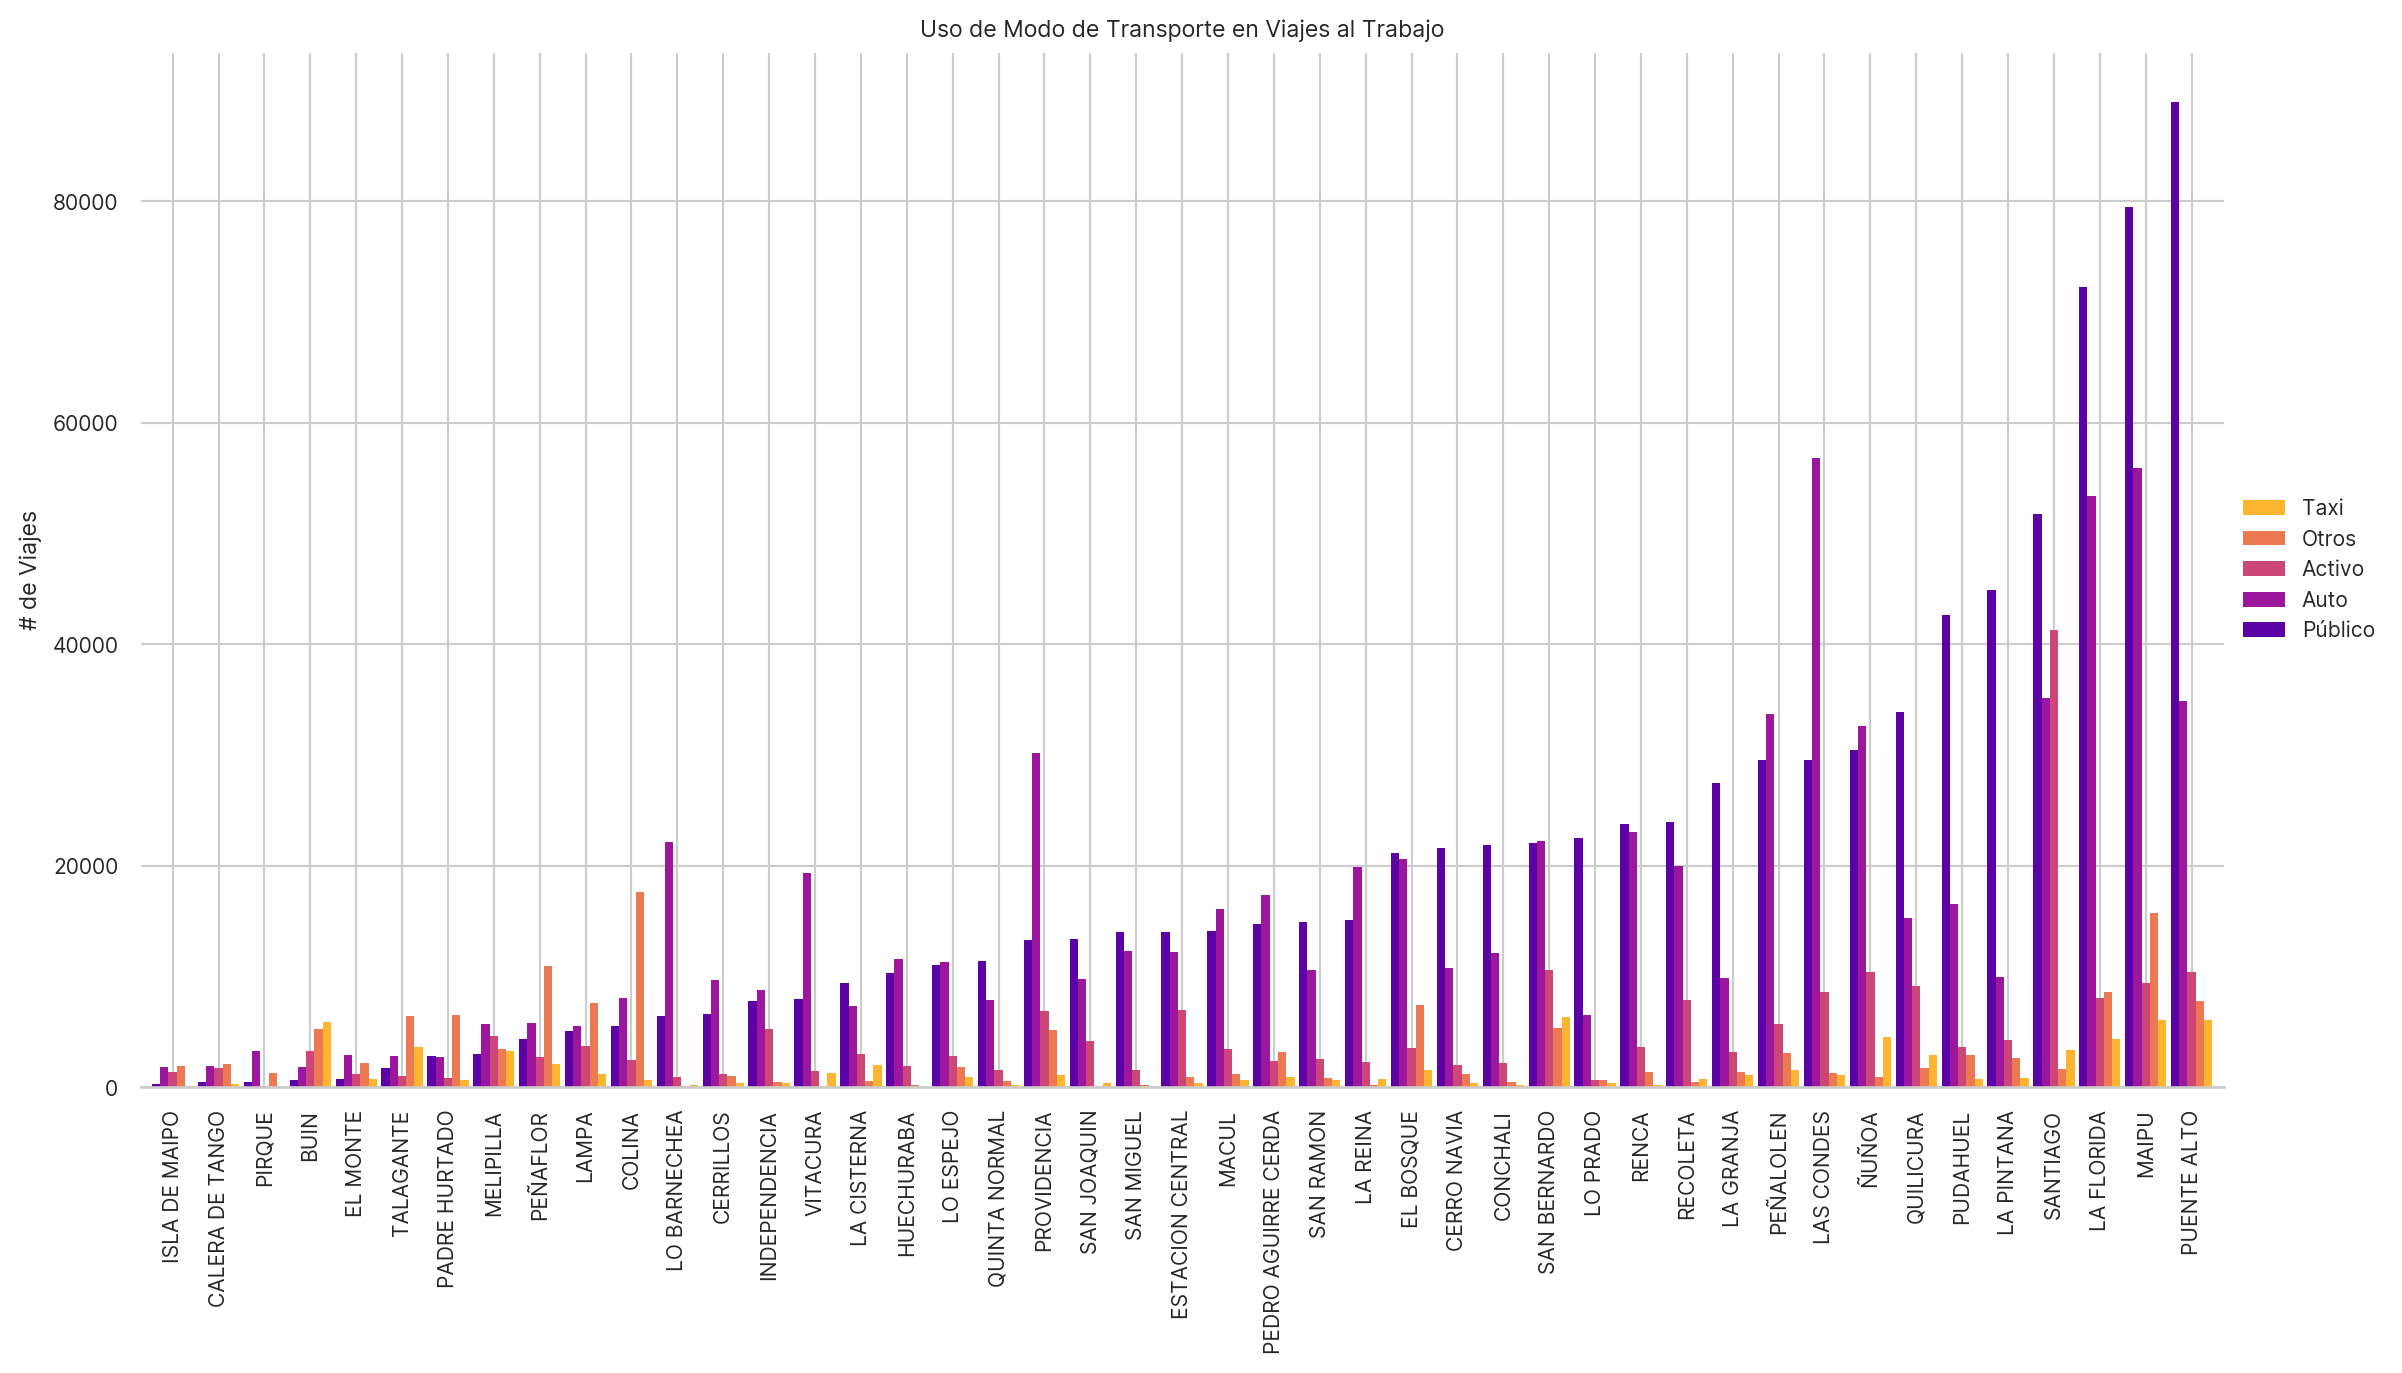

In [22]:
fig, ax = plt.subplots(figsize=(14, 7))

barchart(
    ax,
    modo_comuna,
    sort_categories=True,
    sort_items=True,
)

ax.set_title("Uso de Modo de Transporte en Viajes al Trabajo")
ax.set_xlabel("")
ax.set_ylabel("# de Viajes")

Text(0, 0.5, '# de Viajes')

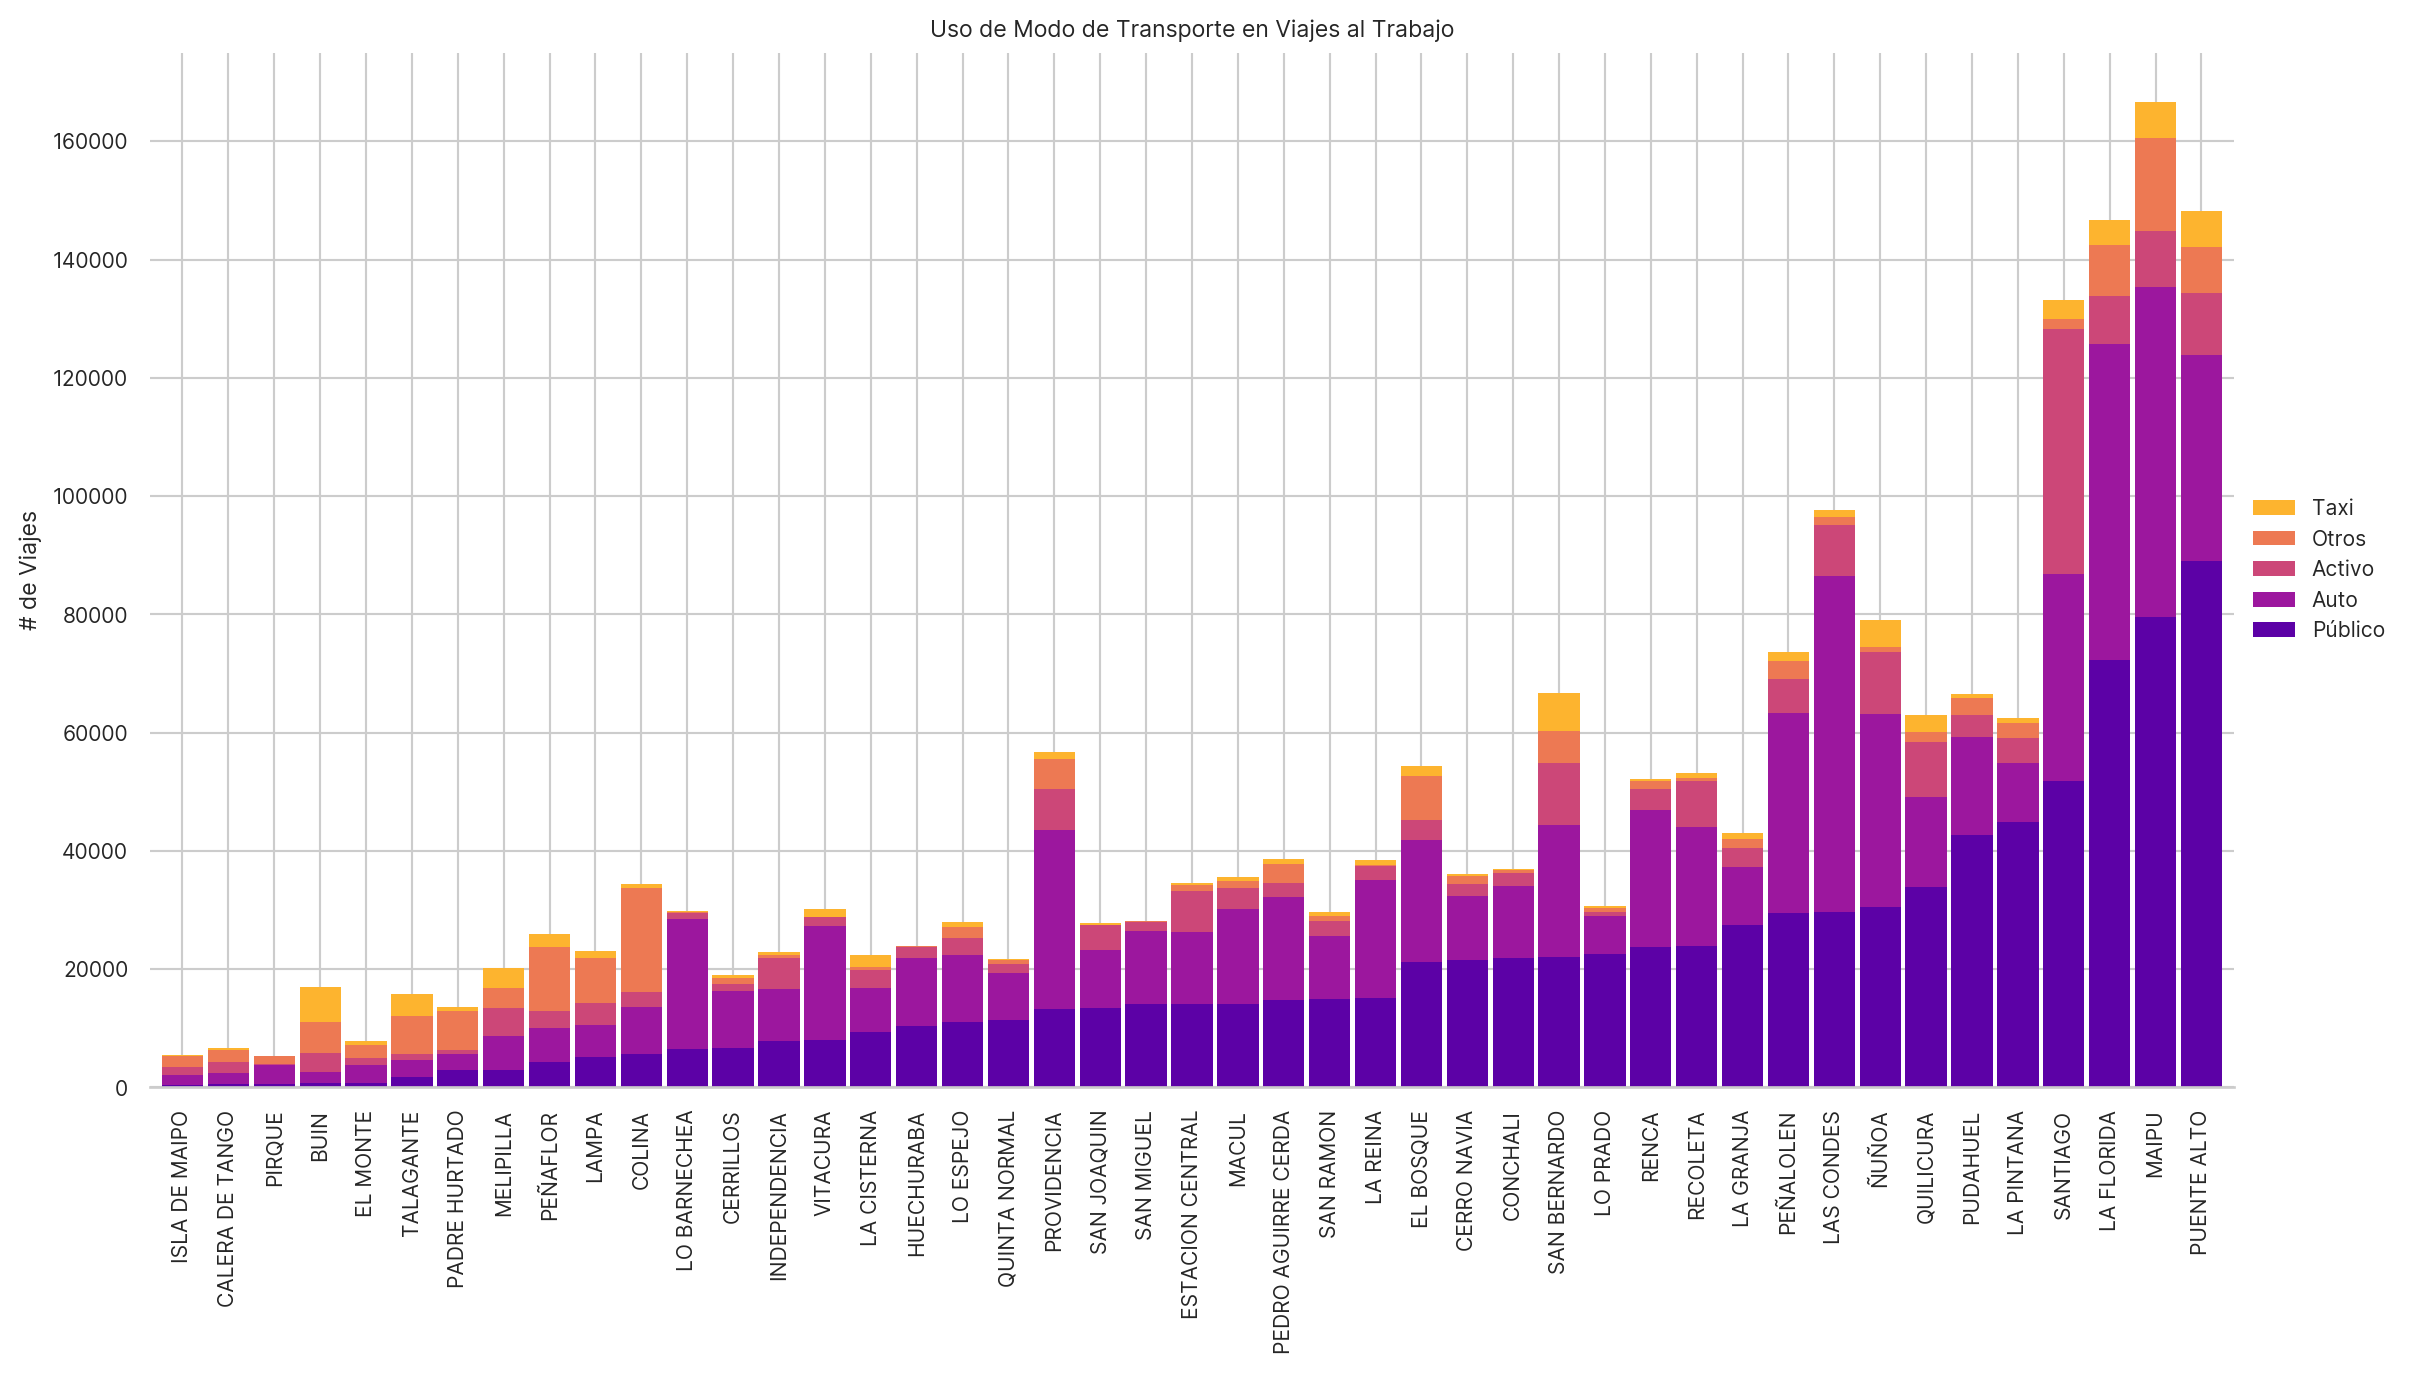

In [23]:
fig, ax = plt.subplots(figsize=(14, 7))

barchart(
    ax,
    modo_comuna,
    stacked=True,
    sort_categories=True,
    sort_items=True,
)

ax.set_title("Uso de Modo de Transporte en Viajes al Trabajo")
ax.set_xlabel("")
ax.set_ylabel("# de Viajes")

Text(0, 0.5, 'Fracción de los Viajes')

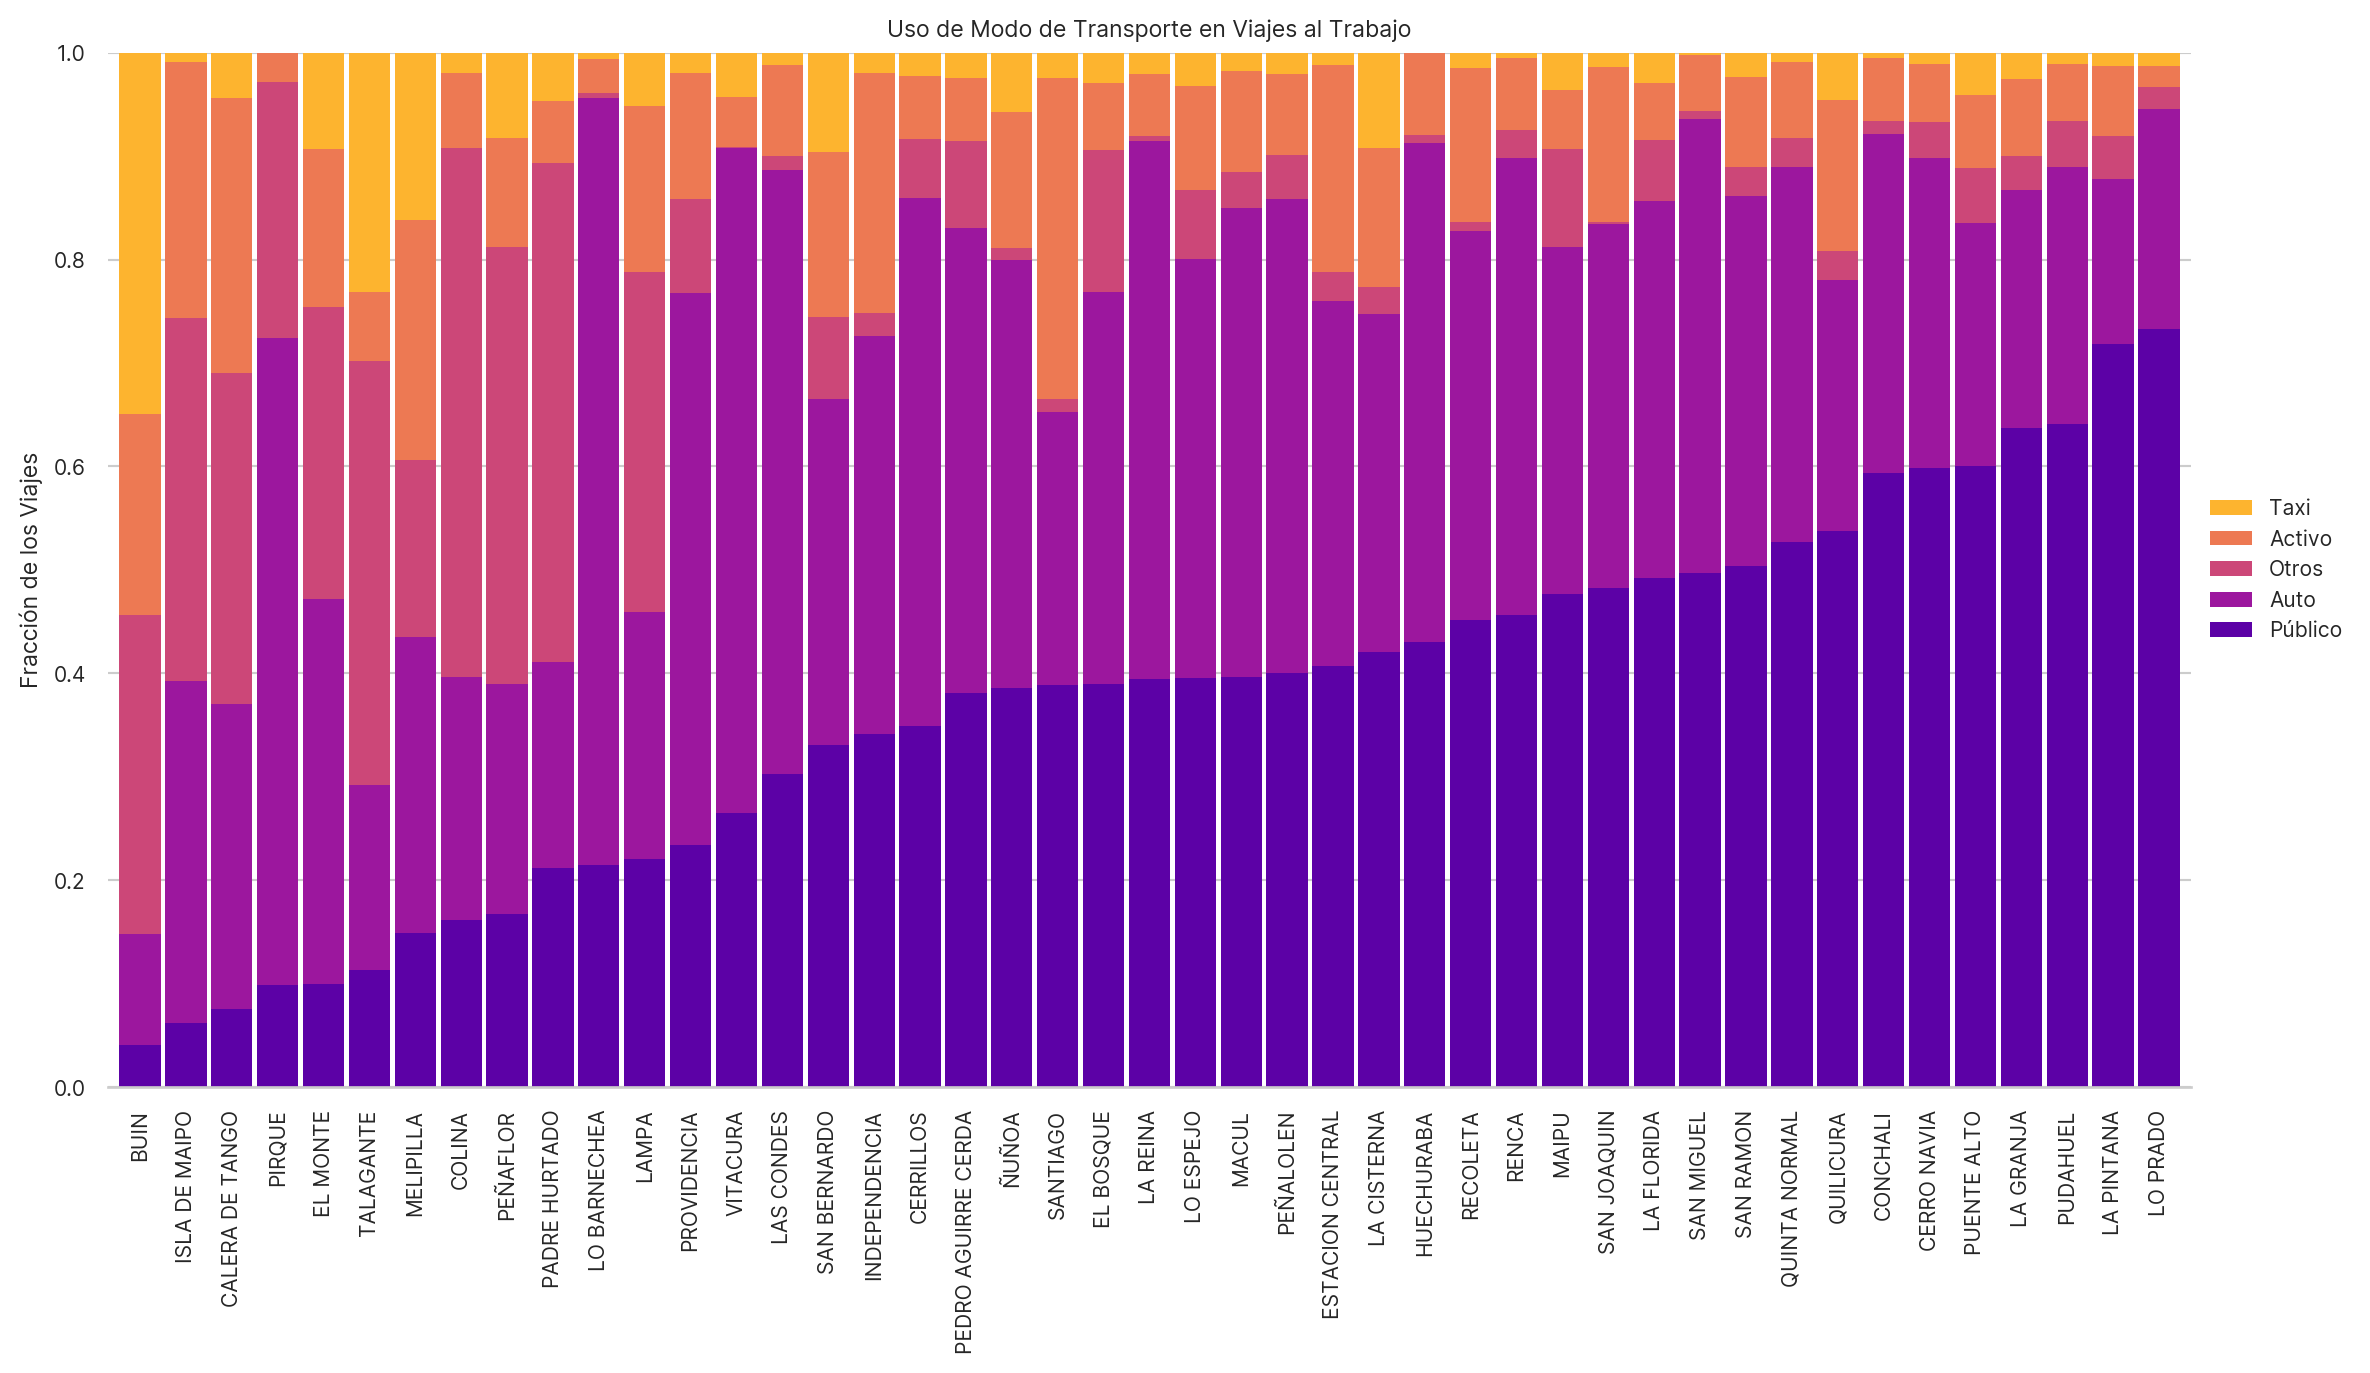

In [24]:
fig, ax = plt.subplots(figsize=(14, 7))

barchart(
    ax,
    modo_comuna,
    stacked=True,
    normalize=True,
    sort_categories=True,
    sort_items=True,
)

ax.set_title("Uso de Modo de Transporte en Viajes al Trabajo")
ax.set_xlabel("")
ax.set_ylabel("Fracción de los Viajes")

Verlo nos lleva a preguntarnos si existe una relación entre las propiedades de una comuna y su uso de transporte público.

Para ello calcularemos el ingreso promedio en cada comuna. Al igual que con los viajes, debemos utilizar el ingreso considerando los factores de expansión:

In [25]:
hogares[['Comuna', 'IngresoHogar']].groupby('Comuna')['IngresoHogar'].mean().astype(int).sort_values()

Comuna
CERRO NAVIA             402763
LO PRADO                425104
EL MONTE                425345
ISLA DE MAIPO           434543
MELIPILLA               448839
ESTACION CENTRAL        449799
LA PINTANA              451238
QUINTA NORMAL           470784
LO ESPEJO               483427
EL BOSQUE               487032
RENCA                   487458
PEDRO AGUIRRE CERDA     491235
TALAGANTE               492734
SAN RAMON               501126
PADRE HURTADO           503274
SAN BERNARDO            504400
PUDAHUEL                517114
BUIN                    518300
LA GRANJA               528271
INDEPENDENCIA           537205
SAN JOAQUIN             539324
PEÑAFLOR                543580
CERRILLOS               546891
RECOLETA                552857
CALERA DE TANGO         566728
LA CISTERNA             575978
PUENTE ALTO             603372
COLINA                  604509
CONCHALI                614372
MAIPU                   625943
QUILICURA               646324
SANTIAGO                668670
L

In [26]:
ingreso_por_comuna = (
    hogares.groupby("Comuna")
    .apply(
        lambda x: (x["FactorHogar"] * x["IngresoHogar"]).sum() / x["FactorHogar"].sum()
    )
    .rename("ingreso")
    .astype(int)
)

ingreso_por_comuna.sort_values()


/tmp/ipykernel_1046/2687268991.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


Comuna
ISLA DE MAIPO           407419
LA PINTANA              419354
CERRO NAVIA             421367
EL MONTE                424736
MELIPILLA               459430
LO PRADO                459634
TALAGANTE               460640
PADRE HURTADO           482747
ESTACION CENTRAL        483239
PEÑAFLOR                484696
SAN BERNARDO            496299
LO ESPEJO               497818
CALERA DE TANGO         505995
SAN JOAQUIN             512128
QUINTA NORMAL           512784
EL BOSQUE               514362
RENCA                   520308
SAN RAMON               523237
CERRILLOS               528750
PUDAHUEL                537591
PEDRO AGUIRRE CERDA     546292
LA GRANJA               559155
PUENTE ALTO             568515
BUIN                    575351
QUILICURA               594006
MAIPU                   595384
CONCHALI                605069
INDEPENDENCIA           605773
LA CISTERNA             616074
RECOLETA                635069
LAMPA                   648293
COLINA                  655243
P

<Axes: ylabel='Comuna'>

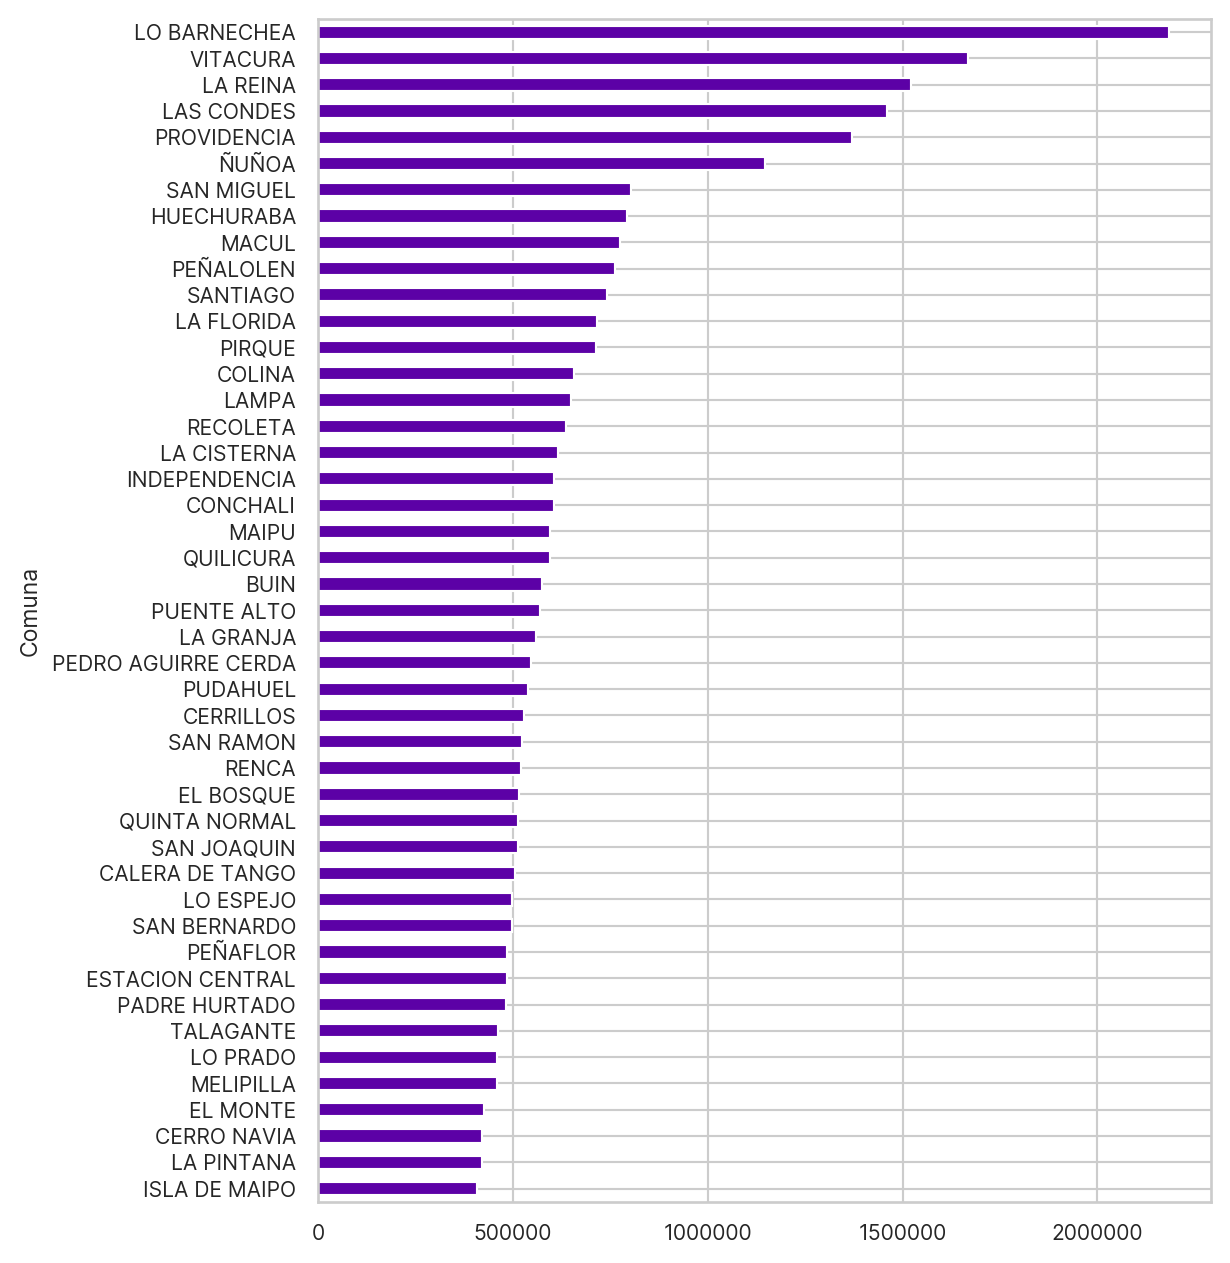

In [27]:
ingreso_por_comuna.sort_values().plot(kind='barh', figsize=(6,8))

Ahora que tenemos esta serie, podemos hacer un cruce entre las dos tablas que hemos calculado. utilizamos la función `normalize_rows` para normalizar los valores de cada comuna, y así poder compararlas:

In [28]:
from aves.features.utils import normalize_rows

modo_comuna_ingreso = modo_comuna.pipe(normalize_rows).join(ingreso_por_comuna)
modo_comuna_ingreso


Activo      Auto     Otros   Público      Taxi  ingreso
Comuna                                                                        
BUIN                 0.193725  0.107270  0.308142  0.041291  0.349572   575351
CALERA DE TANGO      0.266105  0.294183  0.320194  0.076049  0.043469   505995
CERRILLOS            0.061347  0.510453  0.056517  0.349265  0.022418   528750
CERRO NAVIA          0.056449  0.299364  0.034505  0.598936  0.010746   421367
COLINA               0.072035  0.234421  0.511835  0.161775  0.019934   655243
CONCHALI             0.060764  0.327605  0.012651  0.593333  0.005647   605069
EL BOSQUE            0.065109  0.379027  0.136779  0.389877  0.029208   514362
EL MONTE             0.152920  0.371919  0.282467  0.099612  0.093082   424736
ESTACION CENTRAL     0.200872  0.352940  0.027706  0.406895  0.011587   483239
HUECHURABA           0.079589  0.482291  0.007520  0.430600  0.000000   791845
INDEPENDENCIA        0.231983  0.385056  0.022331  0.341264  0.019366   605773
ISLA DE MAIPO        0.247350  0.330588  0.350727  0.061846  0.009490   407419
LA CISTERNA          0.134945  0.326259  0.025803  0.421166  0.091826   616074
LA FLORIDA           0.055281  0.363994  0.058446  0.492683  0.029597   714787
LA GRANJA            0.074658  0.229688  0.032691  0.637321  0.025642   559155
LA PINTANA           0.067788  0.158756  0.041945  0.718588  0.012922   419354
LA REINA             0.060103  0.519673  0.004988  0.394529  0.020707  1521881
LAMPA                0.160118  0.238732  0.328389  0.221091  0.051670   648293
LAS CONDES           0.088577  0.582780  0.013689  0.303268  0.011686  1460452
LO BARNECHEA         0.032855  0.740779  0.005473  0.214873  0.006020  2182362
LO ESPEJO            0.100216  0.404966  0.066760  0.395445  0.032614   497818
LO PRADO             0.020619  0.212207  0.021113  0.733298  0.012764   459634
MACUL                0.097437  0.453562  0.034638  0.396520  0.017843   773965
MAIPU                0.056568  0.335403  0.094535  0.477072  0.036421   595384
MELIPILLA            0.231805  0.285282  0.171141  0.149669  0.162102   459430
PADRE HURTADO        0.059694  0.199625  0.482202  0.211615  0.046865   482747
PEDRO AGUIRRE CERDA  0.061026  0.449226  0.083722  0.381401  0.024625   546292
PEÑAFLOR             0.105081  0.222620  0.422243  0.167451  0.082605   484696
PEÑALOLEN            0.077887  0.458068  0.042694  0.400617  0.020734   761794
PIRQUE               0.028044  0.625426  0.247439  0.099091  0.000000   711750
PROVIDENCIA          0.121978  0.533333  0.090789  0.234599  0.019301  1370451
PUDAHUEL             0.055488  0.249076  0.043571  0.640781  0.011084   537591
PUENTE ALTO          0.070497  0.235149  0.052612  0.600489  0.041253   568515
QUILICURA            0.145305  0.242567  0.028269  0.537750  0.046109   594006
QUINTA NORMAL        0.072812  0.362305  0.028586  0.526920  0.009376   512784
RECOLETA             0.148950  0.376130  0.008465  0.451317  0.015139   635069
RENCA                0.069543  0.441549  0.027295  0.456583  0.005031   520308
SAN BERNARDO         0.159247  0.333581  0.080065  0.331224  0.095882   496299
SAN JOAQUIN          0.149654  0.352366  0.001883  0.482359  0.013739   512128
SAN MIGUEL           0.054842  0.438127  0.007766  0.497170  0.002096   802393
SAN RAMON            0.086269  0.358222  0.028163  0.503380  0.023967   523237
SANTIAGO             0.310191  0.263619  0.012457  0.388669  0.025064   742395
TALAGANTE            0.067101  0.178649  0.410022  0.113162  0.231066   460640
VITACURA             0.048466  0.641906  0.000980  0.265451  0.043196  1666897
ÑUÑOA                0.131946  0.413206  0.011783  0.385924  0.057140  1145986

Para comparar el uso de transporte público y el ingreso poddemos utilizar un `scatterplot`:

<Axes: xlabel='ingreso', ylabel='Público'>

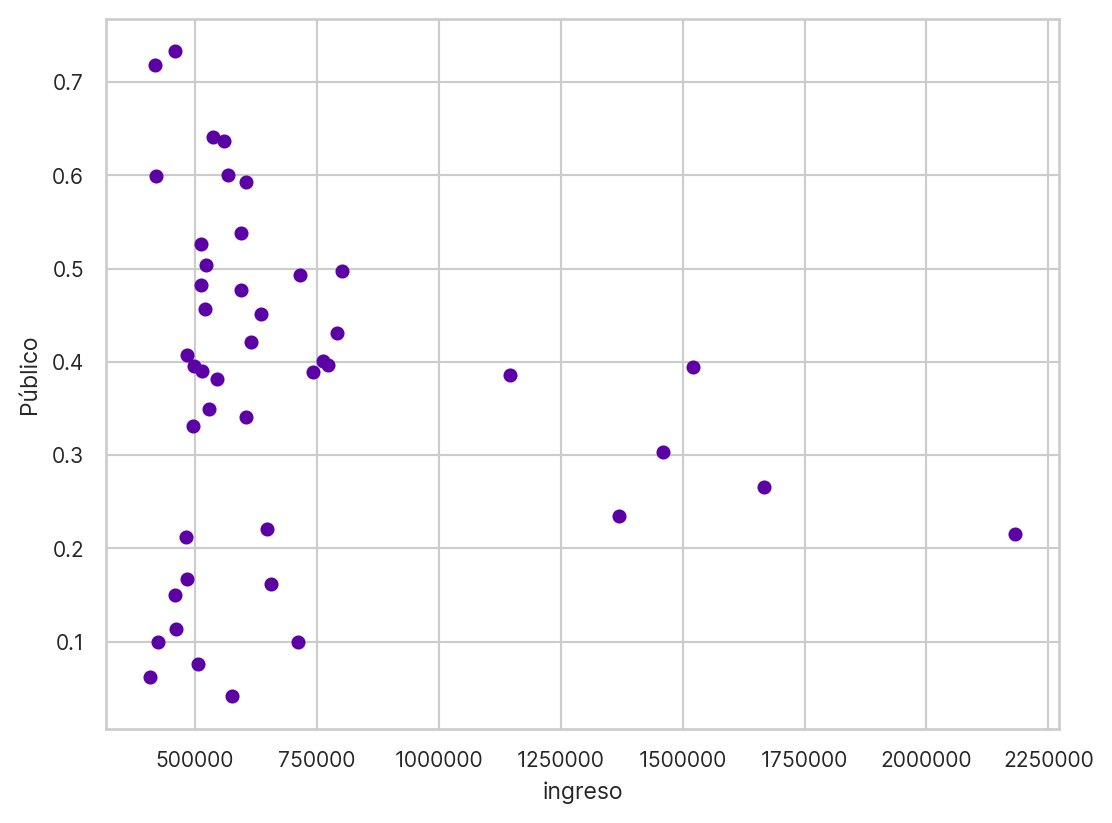

In [29]:
modo_comuna_ingreso.plot(x="ingreso", y="Público", kind="scatter")


Aunque nos gustaría saber cuál es la comuna que corresponde a cada punto, el gráfico no lo dice. Además el eje `x` utiliza una notación que nos impide apreciar los valores totales. Para ello podemos utilizar el método `scatterplot` en aves, en conjunto con configuraciones de matplotlib:

In [30]:
from aves.visualization.tables import scatterplot

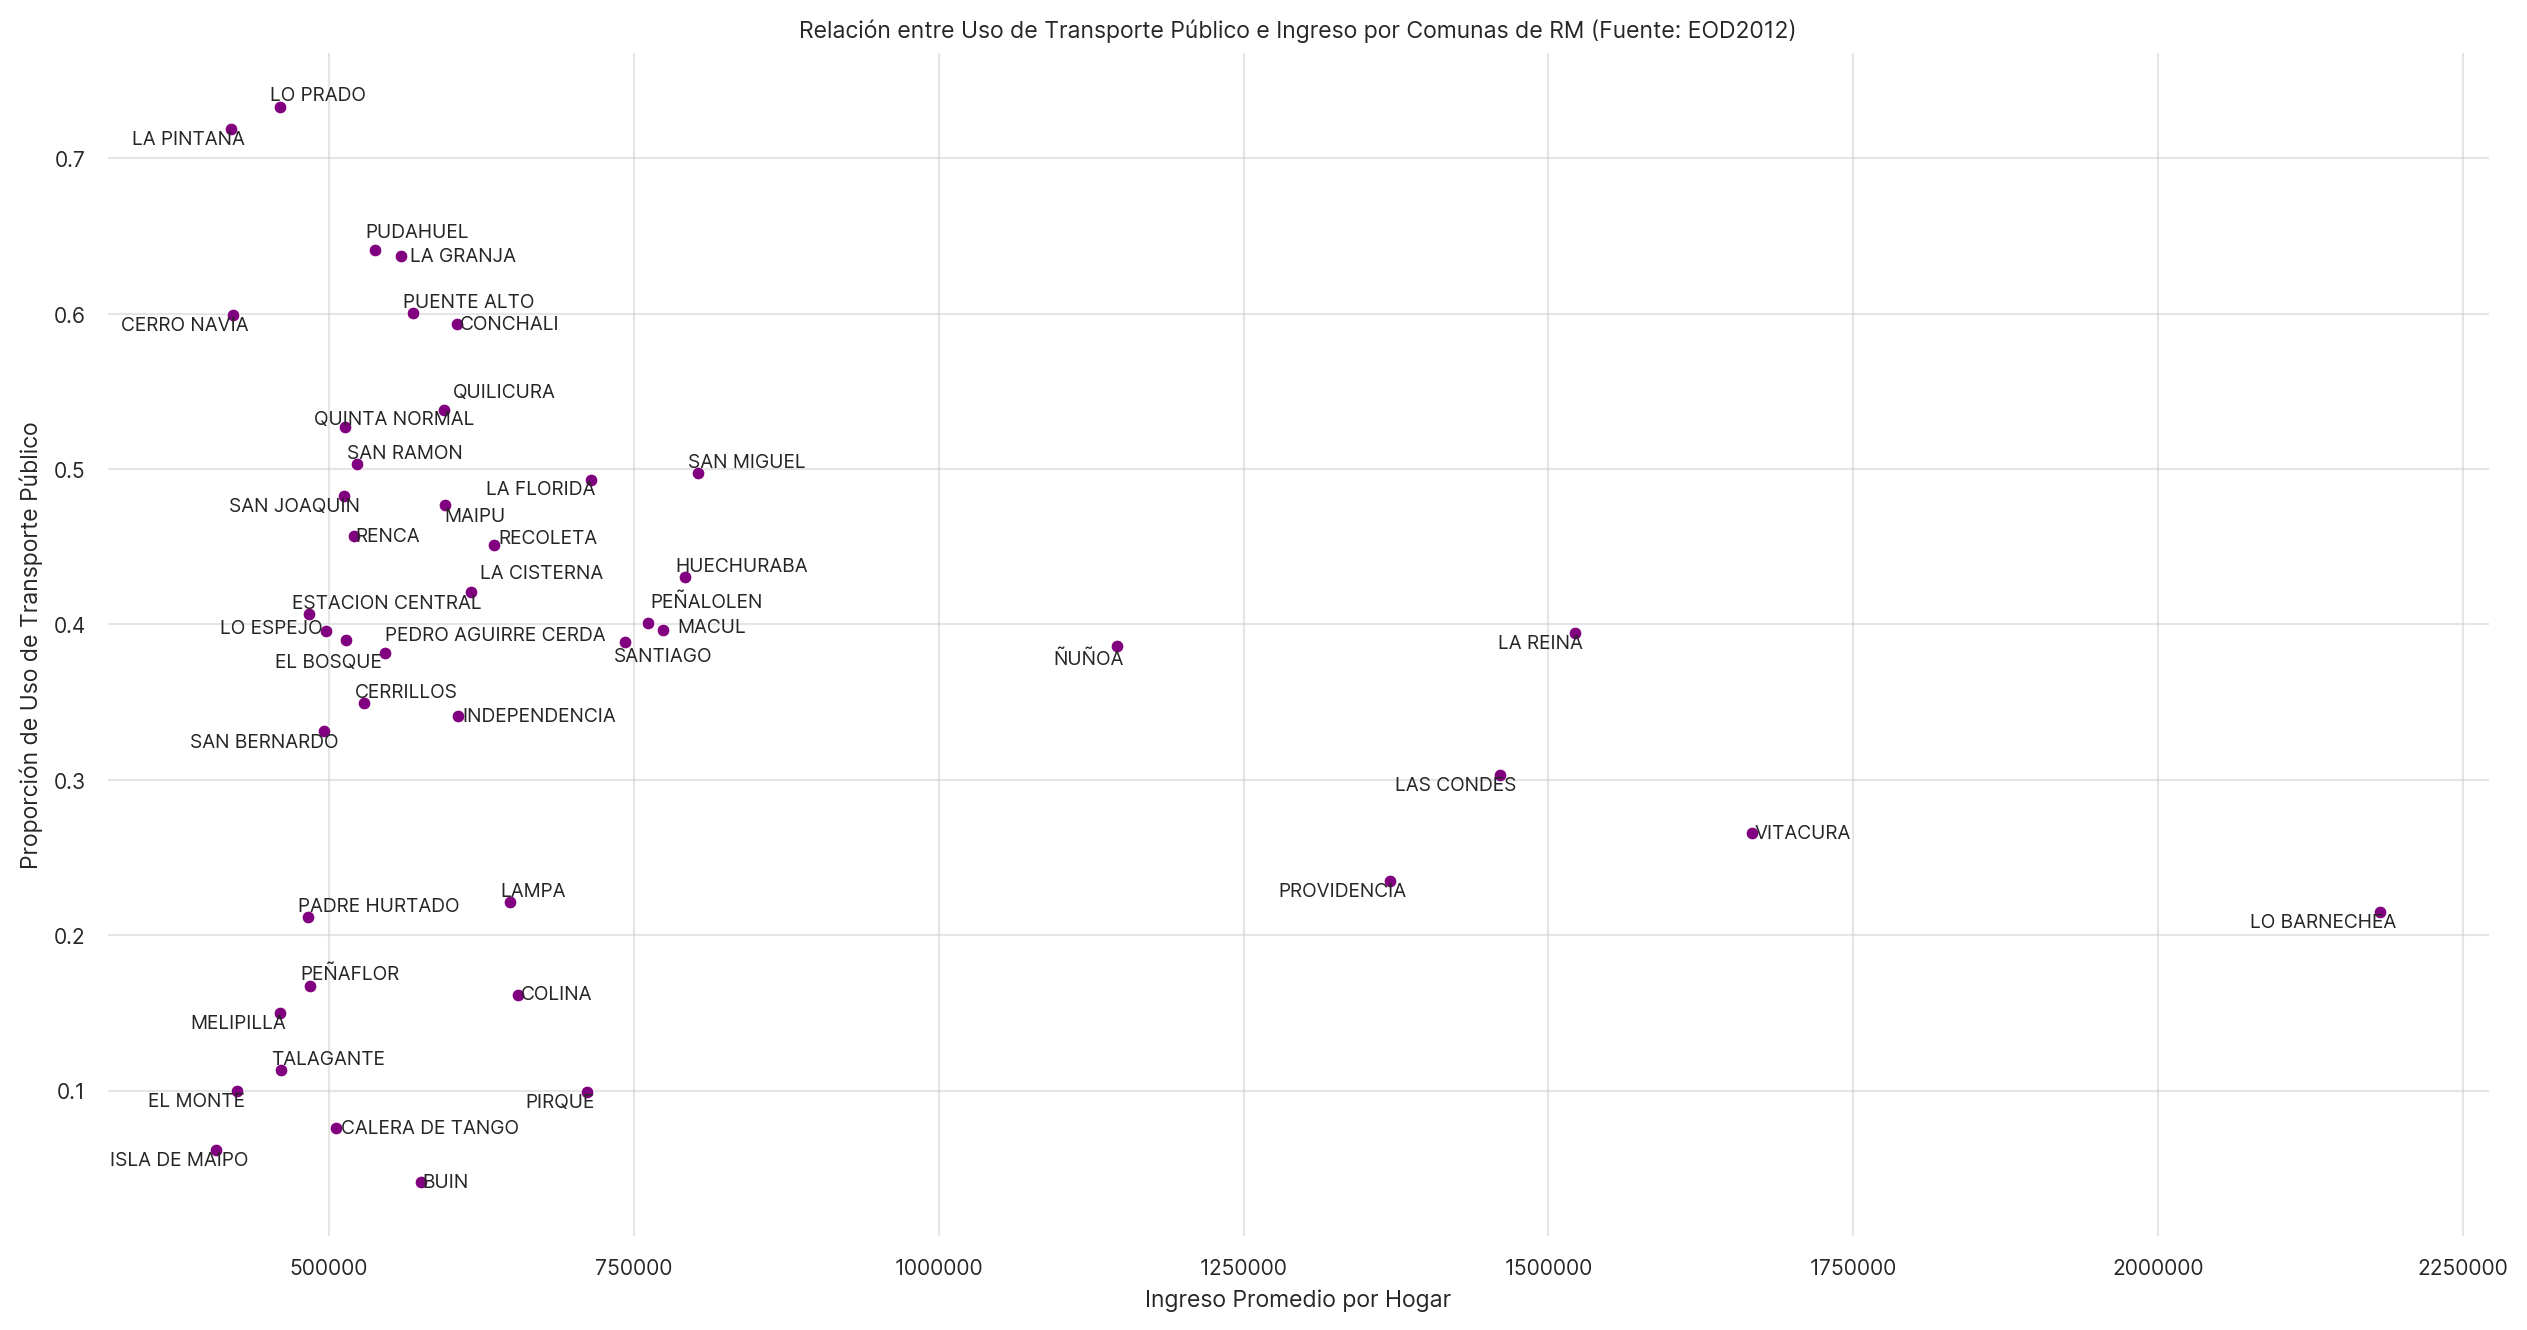

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

scatterplot(
    ax,
    modo_comuna_ingreso,
    "ingreso",
    "Público",
    annotate=True,
    avoid_collisions=True,
    label_args=dict(fontsize="small"),
    scatter_args=dict(color="purple"),
)

ax.set_xlabel("Ingreso Promedio por Hogar")
ax.set_ylabel("Proporción de Uso de Transporte Público")
ax.set_title(
    "Relación entre Uso de Transporte Público e Ingreso por Comunas de RM (Fuente: EOD2012)"
)
ax.grid(alpha=0.5)
ax.ticklabel_format(style="plain")

sns.despine(ax=ax, left=True, bottom=True, right=True, top=True)

Observamos que los tres grupos de uso de transporte público son: las comunas fuera del radio urbano (esquina inferior izquierda), que no son más ricas que el resto y no usan transantiago porque no llega a ellas; las comunas ricas (inferior derecha), que casi no usan transporte público a pesar de estar bien conectadas; y el resto, que presenta tasas variables de uso de transporte público.
  

## ¿Cuáles son las rutinas en la ciudad?

Para mejorar el funcionamiento de una ciudad es clave entender qué se hace en ella y cuándo.

Sabemos que el qué se hace está codificado en el atributo categórico `Proposito`. También sabemos que el atributo categórico `DiaAsig` se refiere al día que está asignado a la persona que responde la encuesta (al día de sus viajes).

In [32]:
tabla_completa["DiaAsig"]


0           jueves
1        miércoles
2        miércoles
3        miércoles
4        miércoles
           ...    
89770      domingo
89771      domingo
89772      domingo
89773      domingo
89774      domingo
Name: DiaAsig, Length: 89775, dtype: object

Definiremos una rutina como la distribución de viajes por tipo de propósito en cada unidad de análisis (en este caso, un día).

Utilizaremos operaciones `groupby` para calcular esa distribución para cada uno de los días de la semana, en periodo normal.

<Axes: ylabel='Proposito'>

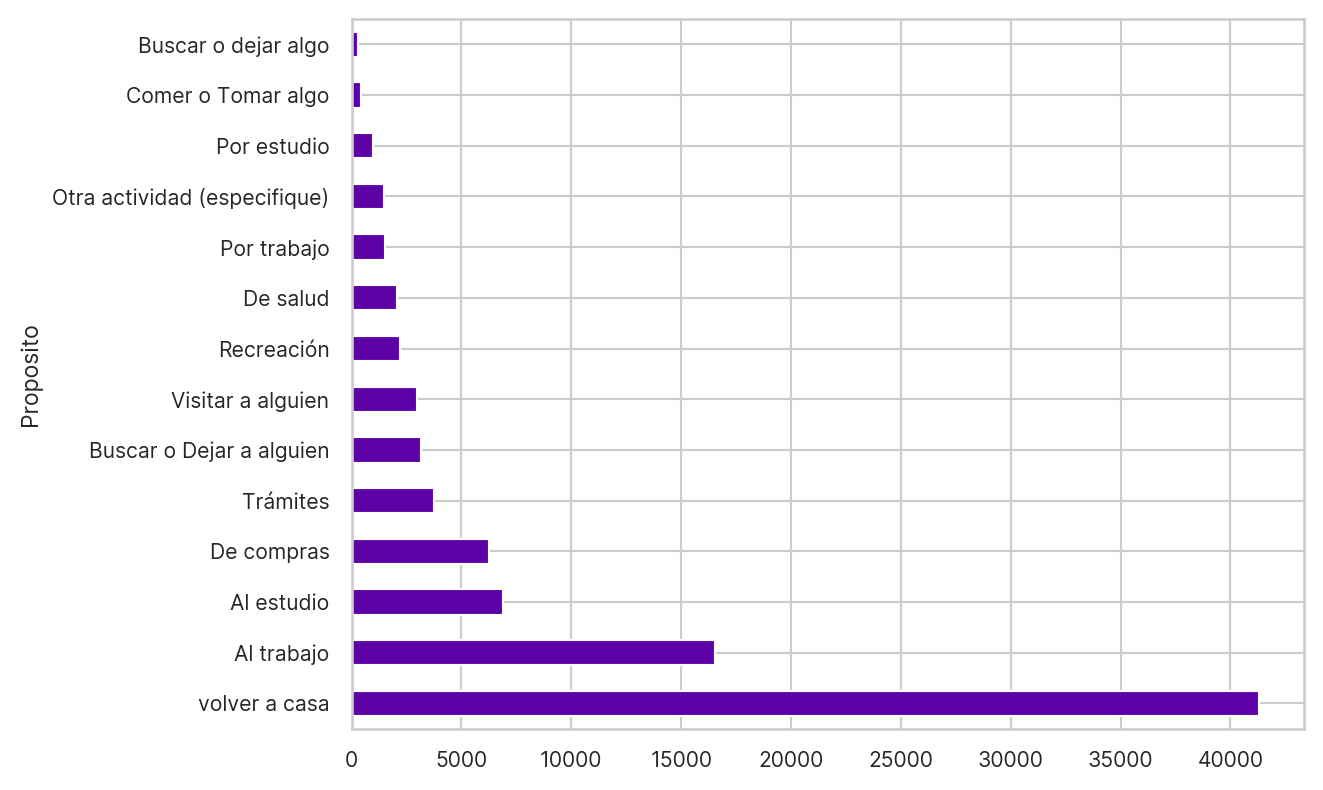

In [33]:
tabla_completa['Proposito'].value_counts().plot(kind='barh')

In [34]:
rutinas = (
    tabla_completa
    .groupby(["DiaAsig", "Proposito"])["Peso"]
    .sum()
    .unstack()
    .loc[["lunes", "martes", "miércoles", "jueves", "viernes", "sábado", "domingo"]]
    # eliminaremos los viajes de volver a casa y de tipo otra actividad porque no ayudan a caracterizar las rutinas diarias.
    .drop(["volver a casa", "Otra actividad (especifique)"], axis=1)
)

rutinas


Proposito     Al estudio     Al trabajo  Buscar o Dejar a alguien  \
DiaAsig                                                             
lunes      159003.124730  316293.367568              73132.456932   
martes     170418.216912  392105.356594              85853.573248   
miércoles  192808.994565  455178.199176              88040.091838   
jueves     180444.642104  406452.299525             114397.466184   
viernes    222546.924573  443611.632080             108072.448233   
sábado       6549.929735  123932.530076              22919.866404   
domingo      1365.568649   80954.738533              18031.754010   

Proposito  Buscar o dejar algo  Comer o Tomar algo     De compras  \
DiaAsig                                                             
lunes              7225.954498        12074.071123   87770.634957   
martes             4699.525999        14531.431494  108246.518137   
miércoles          9134.021504        21738.399054  161290.716078   
jueves             5524.044901        10838.657163  135551.782058   
viernes            9513.543380        15657.148023  163396.700716   
sábado             4753.552588         5512.512097  159191.084196   
domingo            2107.011594         6596.475800  174561.769601   

Proposito      De salud   Por estudio   Por trabajo    Recreación  \
DiaAsig                                                             
lunes      39473.197185  16248.692482  34783.629175  25122.870724   
martes     40470.004240  17872.622108  39718.728270  33942.625074   
miércoles  66730.618650  19108.975964  70502.145352  33300.823836   
jueves     46559.225899  14967.667016  49297.748485  35870.969056   
viernes    45079.394977  22096.329992  57534.860535  58698.092712   
sábado     12927.596680   6425.900982  14139.914461  80059.006877   
domingo     6744.770941   6860.201348  14105.297866  93984.526573   

Proposito       Trámites  Visitar a alguien  
DiaAsig                                      
lunes       69121.083701       31593.338060  
martes      83657.821650       44079.909840  
miércoles   98600.791569       64406.954252  
jueves      85694.082985       54645.048105  
viernes    105577.043480       71279.013897  
sábado      26199.539858       67644.087697  
domingo     27759.660943      100227.499379

¿Cómo visualizar esta tabla? Una manera directa es utilizar el método `plot` de pandas, que usará un `linechart`. Veamos como luce:

<Axes: xlabel='DiaAsig'>

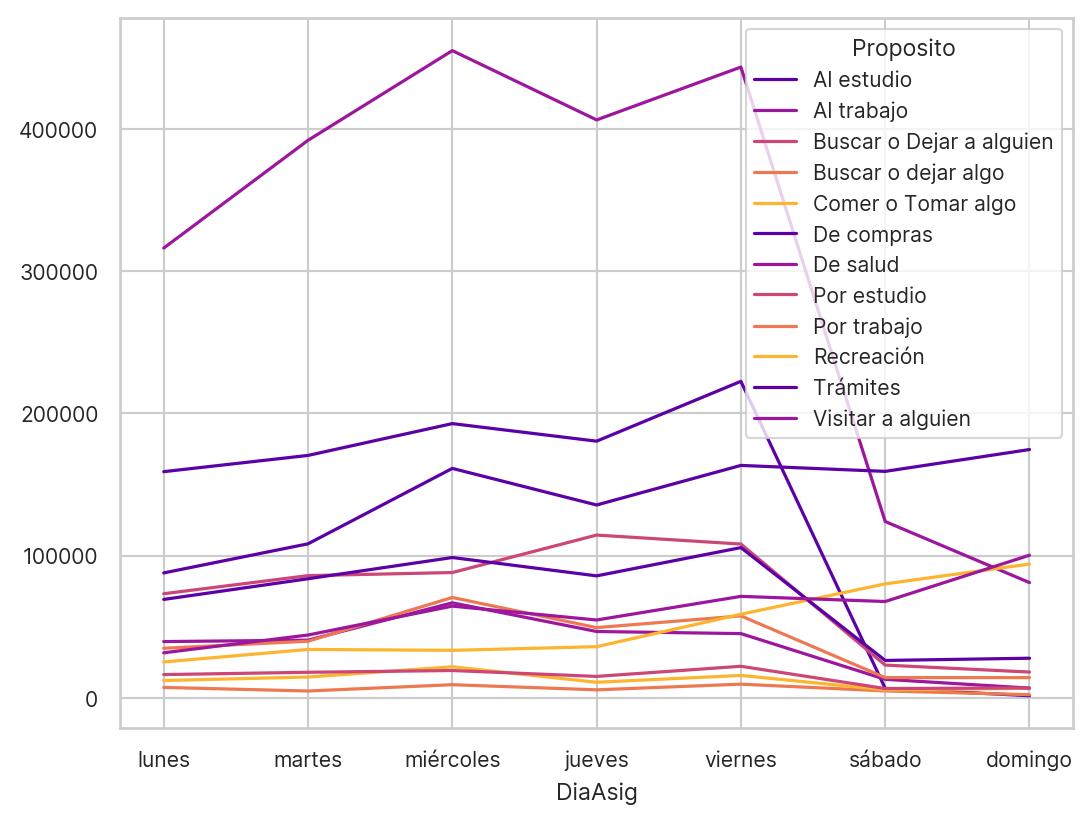

In [35]:
rutinas.plot()


No se ve bonito, pero tampoco configuramos nada del gráfico, solamente lo ejecutamos para tener una noción de cómo se verían los datos. 

A pesar de que podríamos utilizar líneas, ya que la progresión de lunes a domingo es ordinal y puede ser interpolada, no tiene un significado relevante para nosotros de acuerdo a la definición de rutina. Además la cantidad de categorías en los datos hace difícil distinguir una línea de otra.

Podemos hacer la misma exploración, esta vez con un `barchart`:

Ahora bien, ¿buscamos es identificar patrones relativos? En tal caso, podemos probar con un gráfico normalizado:

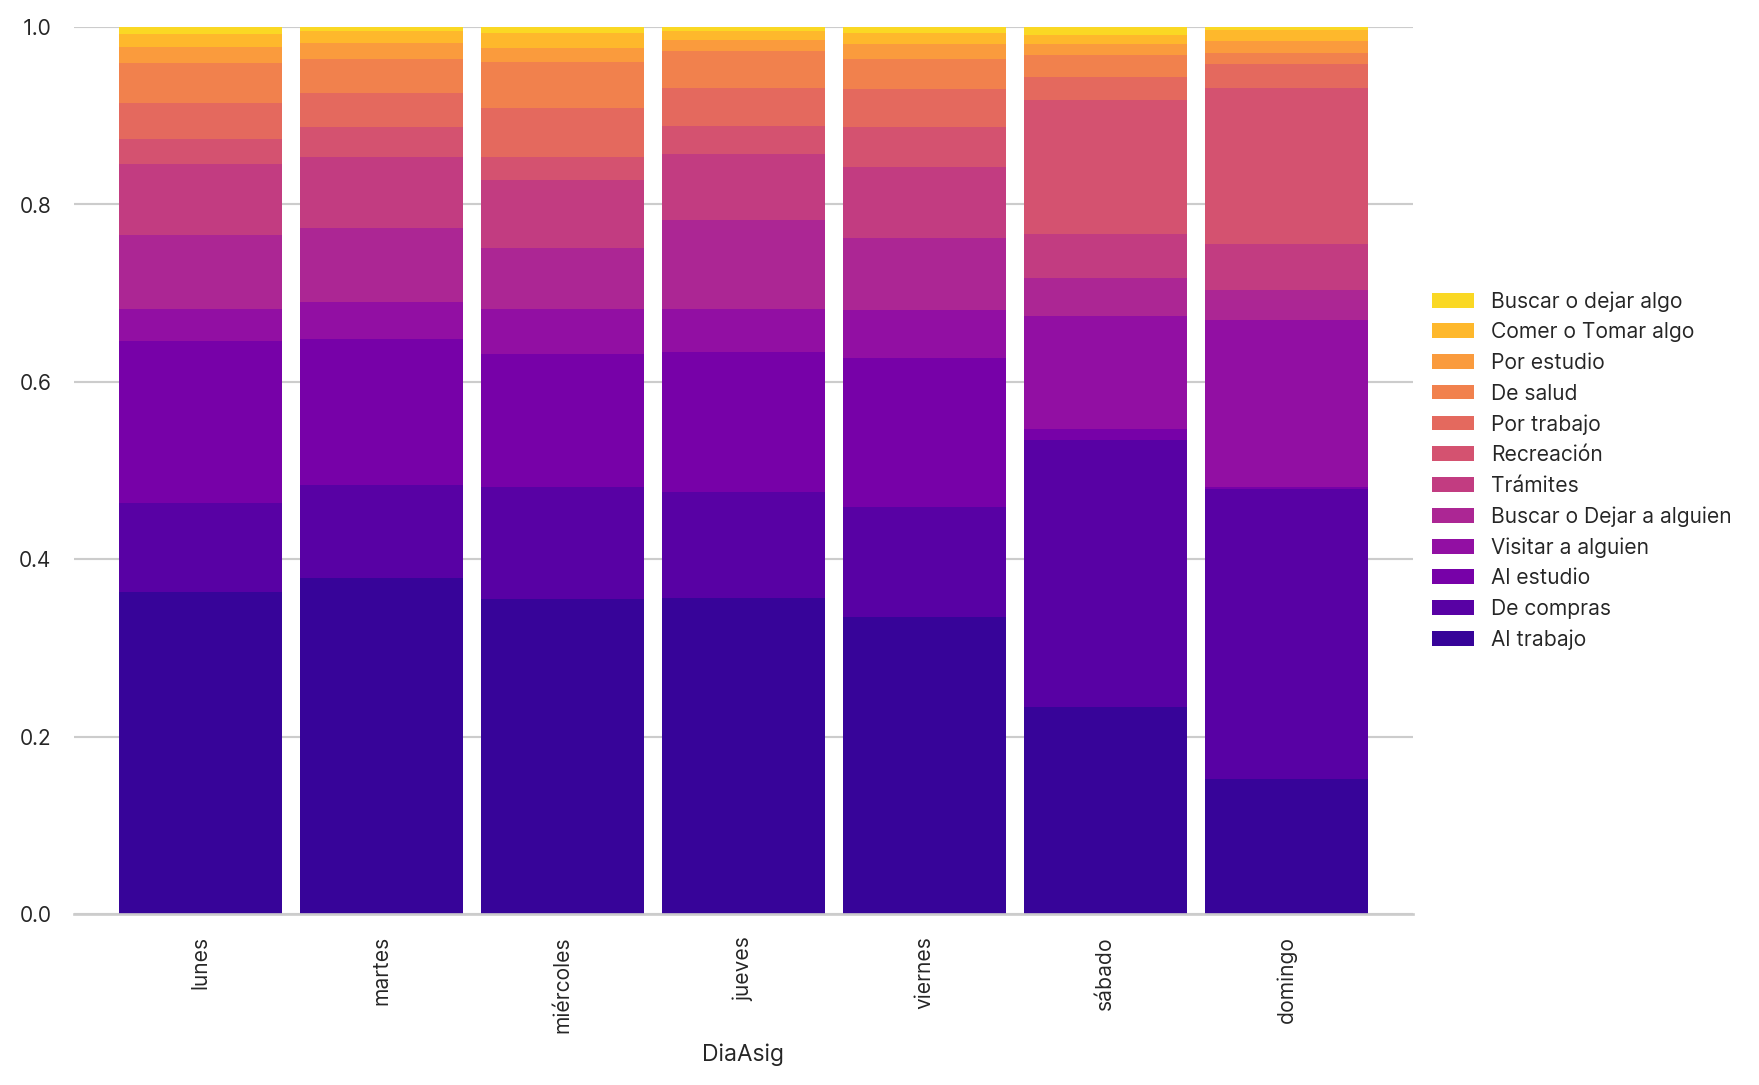

In [36]:
fig, ax = plt.subplots(figsize=(9, 6))
barchart(ax, rutinas, stacked=True, normalize=True, sort_categories=True)


Al usar un gráfico relativo encontramos diferencias que antes no parecían tan notorias. Por ejemplo, en proporción, los viajes de recreación son más frecuentes los fines de semana que de lunes a viernes. En el gráfico absoluto se notaba un ligero incremento, pero quizás lo interesante es que, así como suben los de recreación, bajan mucho los demás. 

Lo mismo sucede con visitar a alguien e ir de compras.

El gráfico de barras podría ser suficiente si lo que queremos es determinar si hay diferencias entre las rutinas. Con esta última versión, sabemos que son diferentes, y tenemos una noción de cuáles son las diferencias.

Sin embargo, si nuestra tarea consistiese en identificar elementos específicos de las rutinas, como puede ser _conocer los valores exactos de la distribución_, o _agrupar actividades de acuerdo a su distribución en varios días_, entonces debemos buscar otra alternativa.

Exploremos como luce un heatmap en este caso:

<Axes: xlabel='Proposito', ylabel='DiaAsig'>

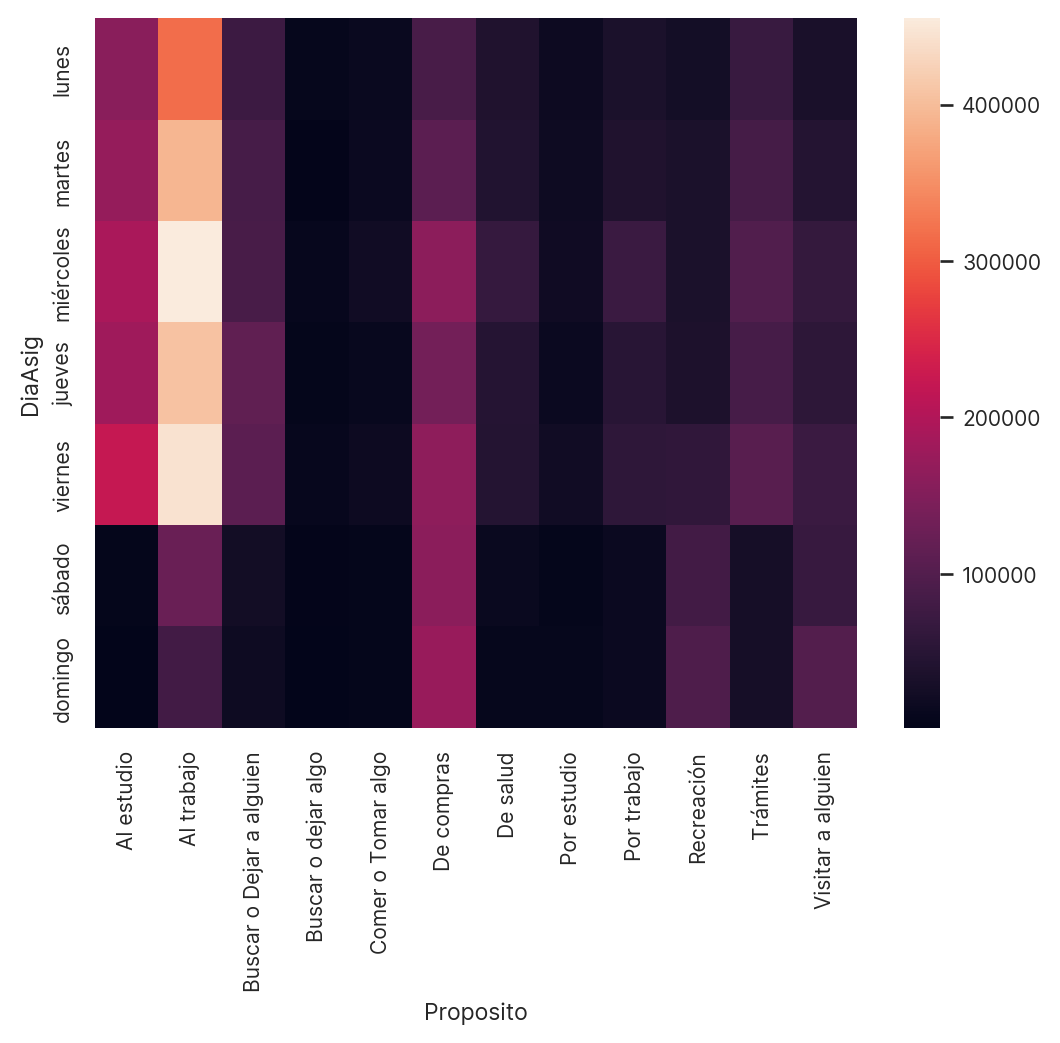

In [37]:
import seaborn as sns

sns.heatmap(rutinas)


Lo que hicimos en el gráfico de barras fue normalizar las columnas de la tabla. Podemos hacer lo mismo. Y luego trasponerla para facilitar la lectura. Quedaría así:

<Axes: xlabel='DiaAsig', ylabel='Proposito'>

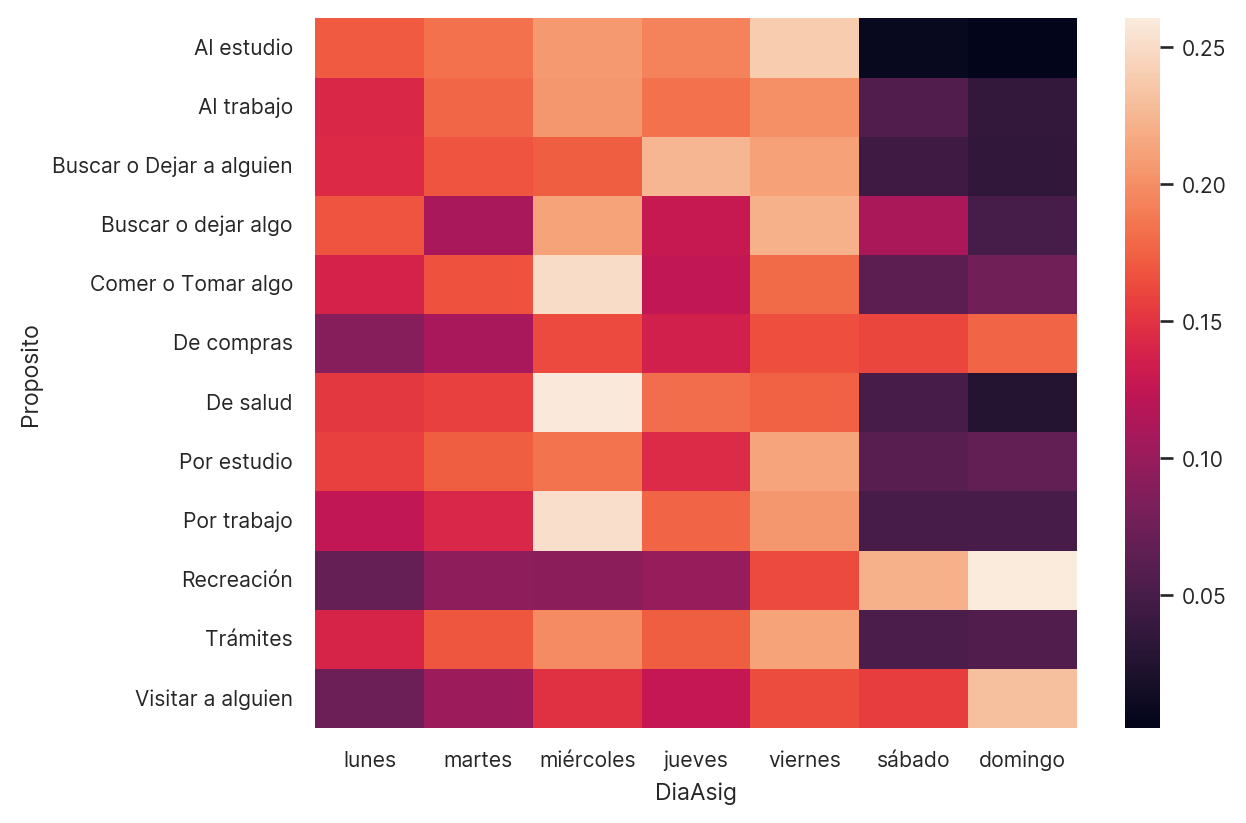

In [38]:
sns.heatmap(rutinas.pipe(normalize_columns).T)


Observamos que este heatmap nos permite apreciar las variaciones diarias en la proporción. Si lo configuramos para que muestre más información y tenga mejor apariencia podría ser el gráfico final de la tarea:

Text(0.5, 1.0, 'Rutinas Diarias en Santiago')

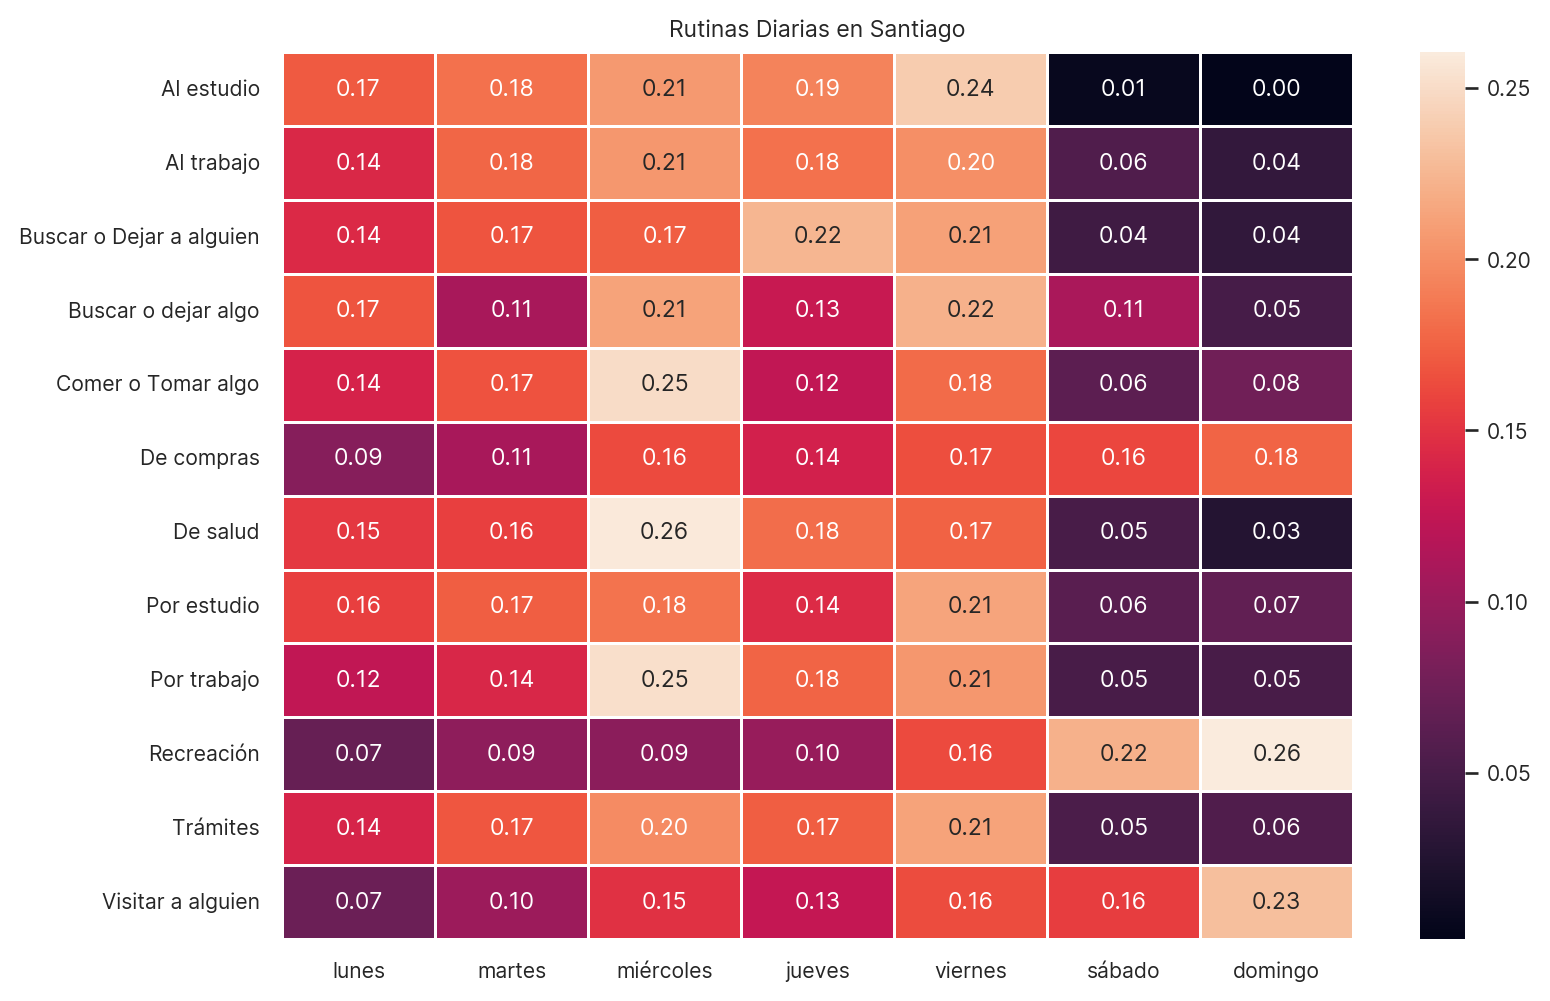

In [39]:
fig, ax = plt.subplots(figsize=(9, 6))

sns.heatmap(
    rutinas.pipe(normalize_columns).T,
    ax=ax,
    annot=True,
    fmt=".2f",
    linewidth=0.5,
)

ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Rutinas Diarias en Santiago")


Ese gráfico ya está terminado: podemos ver patrones globales gracias a la escala de colores, y podemos comparar e identificar valores específicos gracias a las anotaciones.

Todavía nos falta poder agrupar las actividades (o filas de la matriz) de acuerdo a su similitud. Afortunadamente lo podemos lograr cambiando el método empleado: usar un `clustermap` en vez de un `heatmap`:

Text(0.5, 1.0, 'Rutinas Diarias en Santiago')

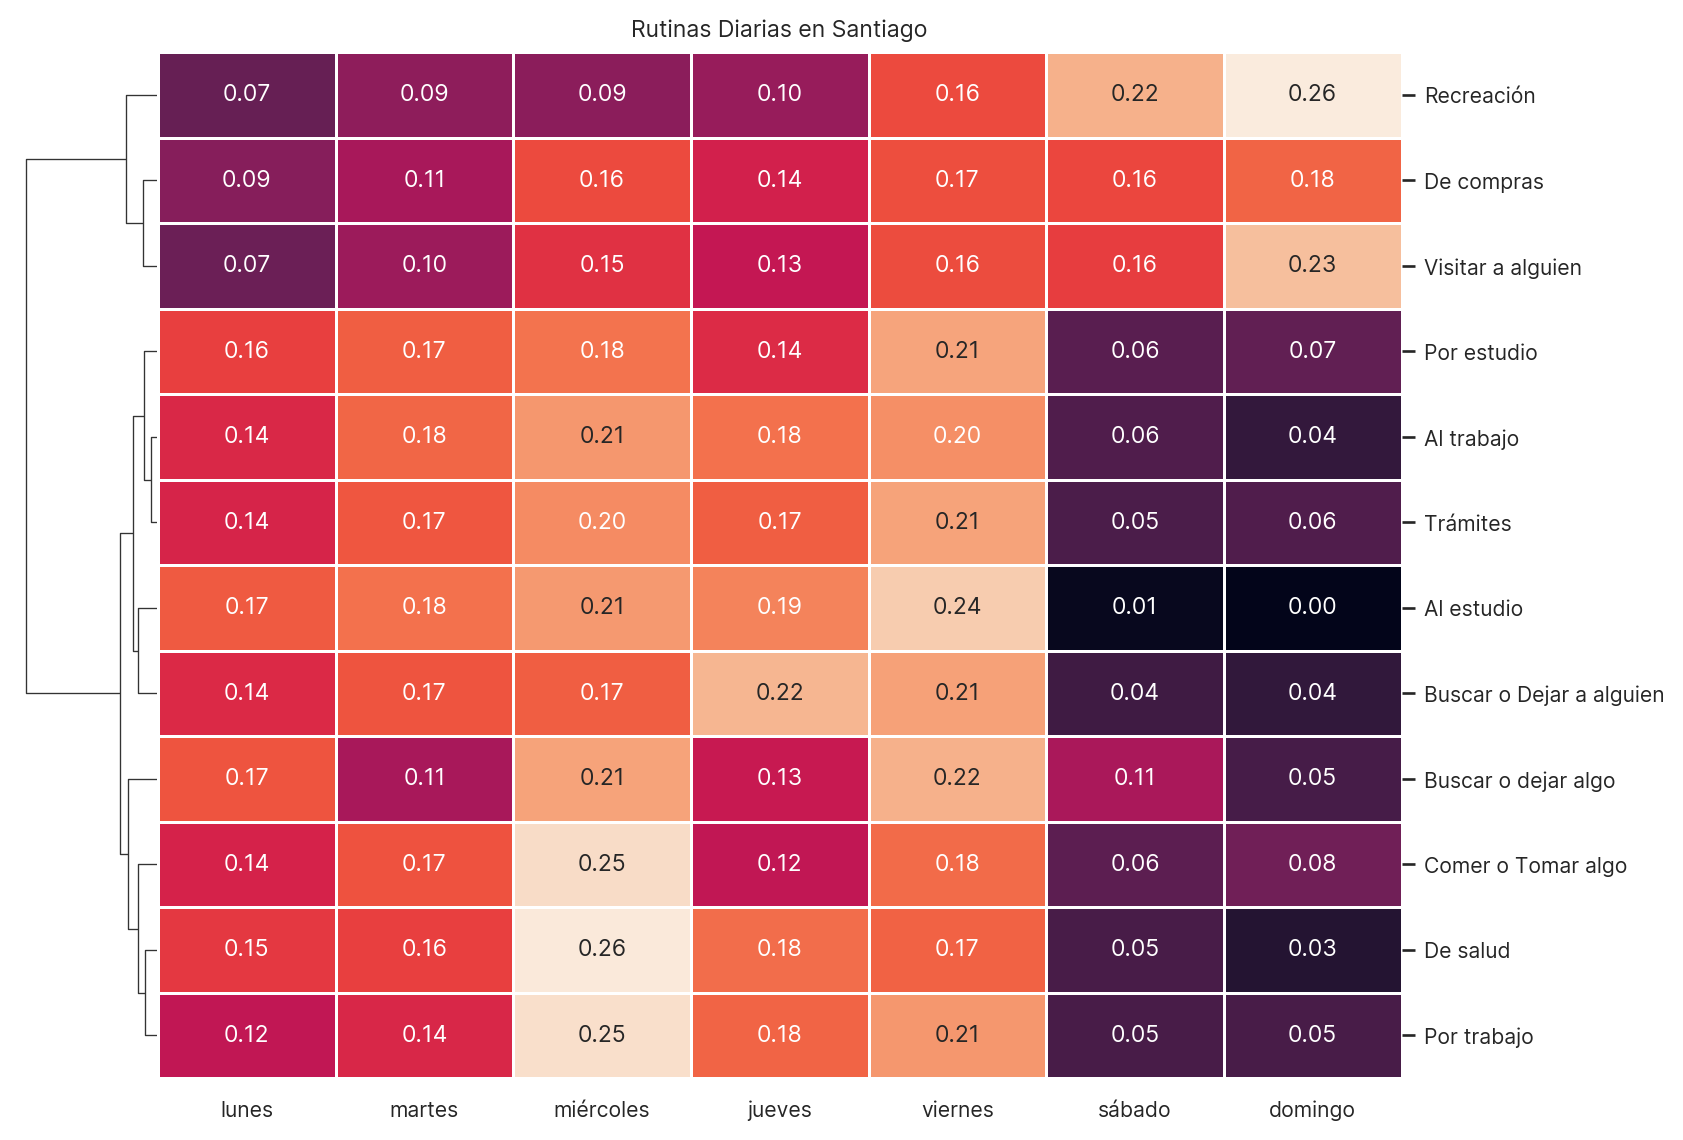

In [40]:
grid = sns.clustermap(
    rutinas.pipe(normalize_columns).T,
    col_cluster=False,
    figsize=(9, 6),
    annot=True,
    fmt=".2f",
    linewidth=0.5,
    dendrogram_ratio=[0.1, 0.0],
    method="ward"
)

grid.ax_cbar.set_visible(False)
# grid.ax_heatmap

grid.ax_heatmap.set_ylabel("")
grid.ax_heatmap.set_xlabel("")
grid.ax_heatmap.set_title("Rutinas Diarias en Santiago")


## ¿Son diferentes las rutinas entre hombres y mujeres? (_lollipop_: un gráfico no visto)

Una primera aproximación es mirar la cantidad de viajes.

In [41]:
from aves.features.utils import weighted_mean

In [42]:
tabla_completa['FactorPersona']

0        53.39174
1        46.32137
2        46.32137
3        43.02566
4        43.02566
           ...   
89770    17.87670
89771    15.34897
89772    15.34897
89773    17.30931
89774    17.30931
Name: FactorPersona, Length: 89775, dtype: float64

/tmp/ipykernel_1046/3177837193.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  personas.groupby("Sexo").apply(


<Axes: ylabel='Viajes'>

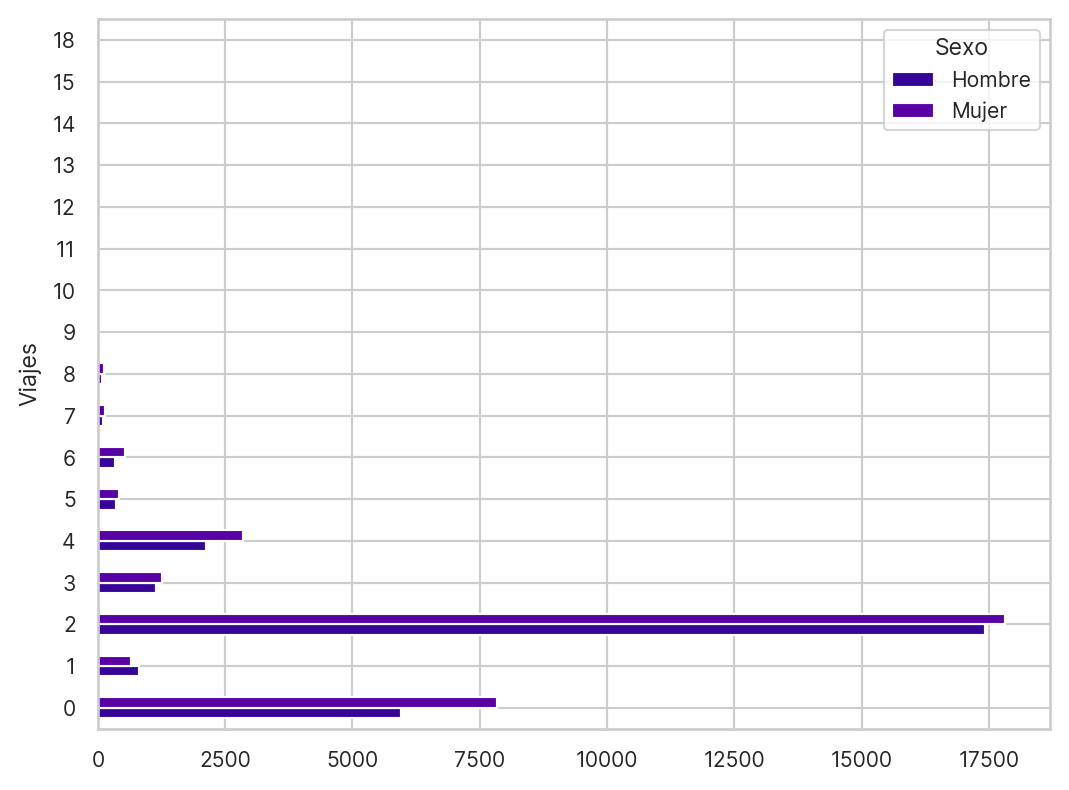

In [43]:
personas.groupby("Sexo").apply(
    lambda x: x["Viajes"].value_counts().sort_index()
).unstack(fill_value=0).T.plot(kind="barh")

In [44]:
personas['Viajes'].mean(), weighted_mean(personas, 'Viajes', 'FactorPersona')

(1.8769940386985047, 1.9589774895693695)

In [45]:
viajes_por_sexo = (
    personas.merge(hogares)
    .groupby(["Sexo", "Sector"])
    .apply(lambda x: weighted_mean(x, "Viajes", "FactorPersona"))
    .unstack()
    .T
)
viajes_por_sexo

/tmp/ipykernel_1046/644985014.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: weighted_mean(x, "Viajes", "FactorPersona"))


Sexo                      Hombre     Mujer
Sector                                    
Centro                  1.941364  1.892221
Extensión Sur-Poniente  1.749888  1.644674
Norte                   1.876654  1.806307
Oriente                 2.694165  2.497469
Poniente                1.870915  1.958558
Sur                     1.937255  1.959056
Sur-Oriente             1.745818  1.716820

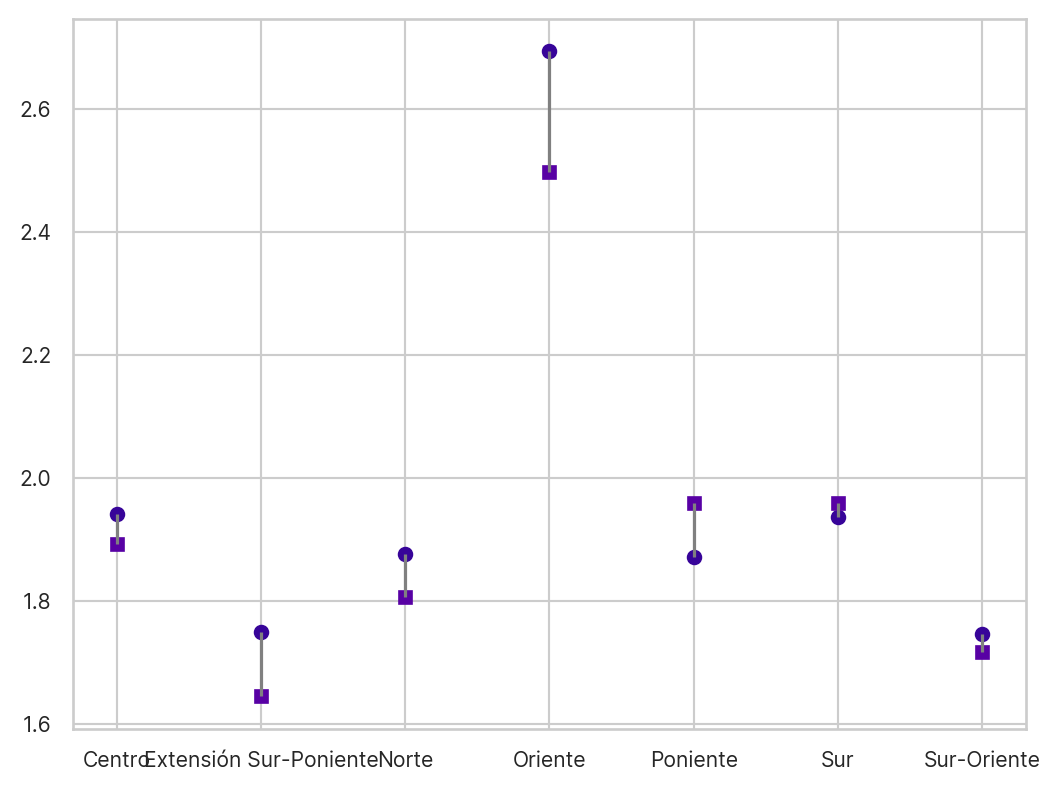

In [46]:
fig, ax = plt.subplots()

ax.plot(viajes_por_sexo['Hombre'], marker='o', linestyle='none')
ax.plot(viajes_por_sexo['Mujer'], marker='s', linestyle='none')
ax.vlines(x=viajes_por_sexo.index, ymin=viajes_por_sexo['Hombre'], ymax=viajes_por_sexo['Mujer'], color='grey')

Text(0.5, 0, 'Cantidad de viajes')

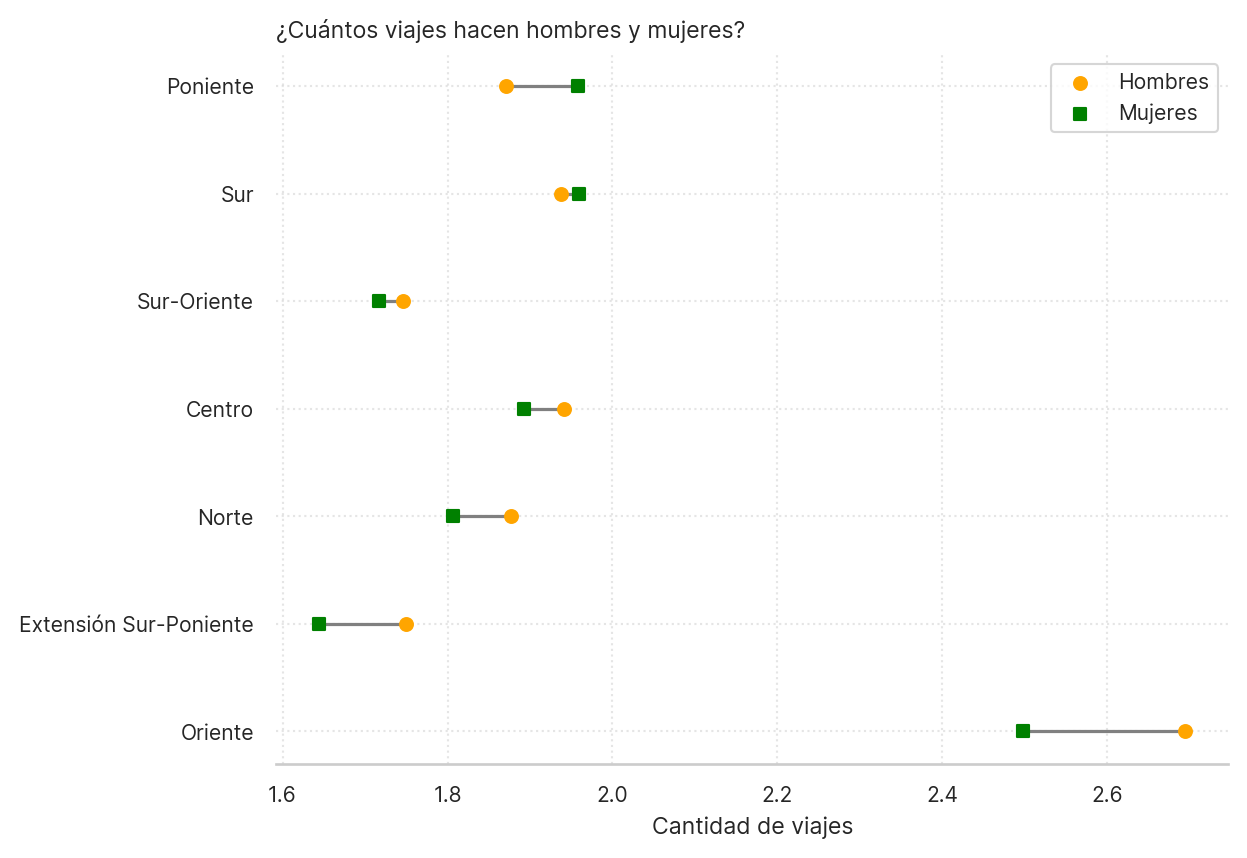

In [47]:
fig, ax = plt.subplots()

plot_df = viajes_por_sexo
plot_df = viajes_por_sexo.assign(diff=lambda x: x['Mujer'] - x['Hombre']).sort_values('diff')

plot_index = range(len(plot_df))

ax.scatter(x=plot_df['Hombre'], y=plot_index, marker='o', label='Hombres', color='orange', zorder=2)
ax.scatter(x=plot_df['Mujer'], y=plot_index, marker='s', label='Mujeres', color='green', zorder=2)
ax.hlines(y=plot_index, xmin=plot_df['Hombre'], xmax=plot_df['Mujer'], color='grey', zorder=1)

ax.set_yticks(plot_index, labels=plot_df.index)
ax.grid(linestyle='dotted', alpha=0.5, zorder=0)

ax.legend()

sns.despine(ax=ax, left=True)
ax.set_title('¿Cuántos viajes hacen hombres y mujeres?', loc='left')
ax.set_xlabel('Cantidad de viajes')

## Propuesto: ¿Qué hacen las personas durante el día?

Inspirándonos en el ejemplo de visualización del New York Times sobre cómo son los días de las personas, nos preguntamos: **¿Qué hacen las personas durante el día?** Podemos aproximarlo utilizando los datos de la encuesta. Para ello tendremos que calcular para cada minuto del día qué está haciendo cada persona y calcular la distribución por minuto.

Tenemos todo lo necesario: la hora de inicio del viaje `HoraIni`, su duración `TiempoViaje` (en minutos) y el `Proposito`. Necesitaremos lo siguiente de pandas:

* La clase `Timedelta` y las funciones `to_timedelta` y `timedelta_range` para ayudarnos a calcular lo que está haciendo una persona.
* `shift` para combinar una celda con la previa/siguiente, de modo de poder determinar las actividades.

Tendremos una versión incompleta y queda propuesto para ustedes completarla y extender su análisis.

Primero, es necesario construir una tabla de actividades. Una actividad es lo que sucede _después_ del viaje, es el motivo por el que se realiza un viaje. Como tenemos viajes, debemos construir las actividades a partir de ellos.

In [48]:
tabla_completa.columns

Index(['Hogar', 'Persona', 'Viaje', 'Etapas', 'ComunaOrigen', 'ComunaDestino',
       'SectorOrigen', 'SectorDestino', 'ZonaOrigen', 'ZonaDestino',
       'OrigenCoordX', 'OrigenCoordY', 'DestinoCoordX', 'DestinoCoordY',
       'Proposito', 'PropositoAgregado', 'ActividadDestino', 'MediosUsados',
       'ModoAgregado', 'ModoPriPub', 'ModoMotor', 'HoraIni', 'HoraFin',
       'HoraMedia', 'TiempoViaje', 'TiempoMedio', 'Periodo', 'MinutosDespues',
       'CuadrasDespues', 'FactorLaboralNormal', 'FactorSabadoNormal',
       'FactorDomingoNormal', 'FactorLaboralEstival',
       'FactorFindesemanaEstival', 'CodigoTiempo', 'ModoDifusion',
       'DistEuclidiana', 'DistManhattan', 'Imputada', 'TipoDia',
       'FactorExpansion', 'AnoNac', 'Sexo', 'Relacion', 'Viajes',
       'LicenciaConducir', 'PaseEscolar', 'AdultoMayor', 'Estudios', 'Curso',
       'Actividad', 'Ocupacion', 'ActividadEmpresa', 'JornadaTrabajo',
       'DondeEstudia', 'DirActividadCoordX', 'DirActividadCoordY',
       'DirEs

In [49]:
tabla_completa['TipoDia']

0        Laboral
1        Laboral
2        Laboral
3        Laboral
4        Laboral
          ...   
89770    Domingo
89771    Domingo
89772    Domingo
89773    Domingo
89774    Domingo
Name: TipoDia, Length: 89775, dtype: object

In [50]:
tabla_actividades = tabla_completa[['Persona', 'Proposito', 'HoraIni', 'TiempoViaje', 'Peso', 'TipoDia']]
tabla_actividades

Persona      Proposito         HoraIni  TiempoViaje       Peso  \
0      17343102  volver a casa 0 days 22:30:00         70.0  53.391740   
1      17344101     Al trabajo 0 days 13:00:00        105.0  52.214368   
2      17344101  volver a casa 0 days 22:00:00         90.0  52.214368   
3      17344103     Al trabajo 0 days 09:00:00         55.0  48.499378   
4      17344103  volver a casa 0 days 19:00:00        150.0  45.295847   
...         ...            ...             ...          ...        ...   
89770  70679101  volver a casa 0 days 12:40:00          8.0  26.495127   
89771  74381301     De compras 0 days 10:30:00         15.0  22.748768   
89772  74381301  volver a casa 0 days 12:00:00         15.0  22.748768   
89773  74381302     De compras 0 days 10:30:00          5.0  25.654196   
89774  74381302  volver a casa 0 days 12:00:00         15.0  25.654196   

       TipoDia  
0      Laboral  
1      Laboral  
2      Laboral  
3      Laboral  
4      Laboral  
...        ...  
89770  Domingo  
89771  Domingo  
89772  Domingo  
89773  Domingo  
89774  Domingo  

[89775 rows x 6 columns]

In [51]:
tabla_actividades.describe()

Persona                    HoraIni   TiempoViaje          Peso
count  8.977500e+04                      89775  89647.000000  89774.000000
mean   1.911238e+07  0 days 13:26:54.095238095     42.436044    143.370645
std    5.361221e+06  0 days 04:45:57.368932602     36.843043    254.588292
min    1.000200e+07            0 days 00:00:00      0.000000      0.431389
25%    1.472900e+07            0 days 09:00:00     20.000000     35.609635
50%    1.897230e+07            0 days 13:30:00     30.000000     67.717904
75%    2.347010e+07            0 days 17:30:00     60.000000    143.157649
max    7.438130e+07            0 days 23:59:00   1335.000000   4612.974967

In [52]:
tabla_actividades = tabla_actividades[tabla_actividades['TiempoViaje'] <= 120]
len(tabla_actividades)

87778

Conocemos la hora de término de un viaje. Esa es la hora de inicio de la actividad. Pero, ¿la hora de fin? Esa depende de la siguiente fila en la tabla. Para ello nos servirá el método `shift`.

In [53]:
tabla_actividades.shift(-1)

Persona          Proposito         HoraIni  TiempoViaje       Peso  \
0      17344101.0         Al trabajo 0 days 13:00:00        105.0  52.214368   
1      17344101.0      volver a casa 0 days 22:00:00         90.0  52.214368   
2      17344103.0         Al trabajo 0 days 09:00:00         55.0  48.499378   
3      17345101.0  Visitar a alguien 0 days 10:00:00         60.0  51.381489   
5      17345101.0      volver a casa 0 days 15:00:00         45.0  51.381489   
...           ...                ...             ...          ...        ...   
89770  74381301.0         De compras 0 days 10:30:00         15.0  22.748768   
89771  74381301.0      volver a casa 0 days 12:00:00         15.0  22.748768   
89772  74381302.0         De compras 0 days 10:30:00          5.0  25.654196   
89773  74381302.0      volver a casa 0 days 12:00:00         15.0  25.654196   
89774         NaN               None             NaT          NaN        NaN   

       TipoDia  
0      Laboral  
1      Laboral  
2      Laboral  
3      Domingo  
5      Domingo  
...        ...  
89770  Domingo  
89771  Domingo  
89772  Domingo  
89773  Domingo  
89774     None  

[87778 rows x 6 columns]

In [54]:
ejemplo = (
    tabla_actividades.join(tabla_actividades.add_prefix("post_").shift(-1))
    .pipe(lambda x: x[x["Persona"] == x["post_Persona"]])
    .drop(
        ["Persona", "post_Persona", "post_TiempoViaje", "post_Peso", "post_Proposito", 'post_TipoDia'],
        axis=1,
    )
    .rename({"post_HoraIni": "fin_actividad"}, axis=1)
    .assign(fin_actividad=lambda x: x["fin_actividad"].round("5min"))
)

ejemplo

Proposito         HoraIni  TiempoViaje       Peso  \
1                    Al trabajo 0 days 13:00:00        105.0  52.214368   
5             Visitar a alguien 0 days 10:00:00         60.0  51.381489   
7      Buscar o Dejar a alguien 0 days 07:50:00         30.0  61.966798   
8                    Al trabajo 0 days 08:30:00         10.0  61.966798   
9      Buscar o Dejar a alguien 0 days 17:20:00         10.0  88.048666   
...                         ...             ...          ...        ...   
89765                  Trámites 0 days 11:00:00         50.0  85.893672   
89767                Al trabajo 0 days 12:00:00          8.0  49.511134   
89769                De compras 0 days 12:00:00         10.0  26.495127   
89771                De compras 0 days 10:30:00         15.0  22.748768   
89773                De compras 0 days 10:30:00          5.0  25.654196   

       TipoDia   fin_actividad  
1      Laboral 0 days 22:00:00  
5      Domingo 0 days 15:00:00  
7      Laboral 0 days 08:30:00  
8      Laboral 0 days 17:20:00  
9      Laboral 0 days 17:40:00  
...        ...             ...  
89765  Domingo 0 days 14:00:00  
89767  Domingo 0 days 12:30:00  
89769  Domingo 0 days 12:40:00  
89771  Domingo 0 days 12:00:00  
89773  Domingo 0 days 12:00:00  

[49568 rows x 6 columns]

Necesitamos calcular la hora de inicio de la actividad. Podemos hacerlo de la siguiente manera:

In [55]:
ejemplo['HoraIni'] + pd.to_timedelta(ejemplo['TiempoViaje'])

1       0 days 13:00:00.000000105
5       0 days 10:00:00.000000060
7       0 days 07:50:00.000000030
8       0 days 08:30:00.000000010
9       0 days 17:20:00.000000010
                   ...           
89765   0 days 11:00:00.000000050
89767   0 days 12:00:00.000000008
89769   0 days 12:00:00.000000010
89771   0 days 10:30:00.000000015
89773   0 days 10:30:00.000000005
Length: 49568, dtype: timedelta64[ns]

In [56]:
ejemplo['inicio_actividad'] = (ejemplo['HoraIni'] + pd.to_timedelta(ejemplo['TiempoViaje'], unit='minutes')).round('5min')
ejemplo['inicio_actividad']

1       0 days 14:45:00
5       0 days 11:00:00
7       0 days 08:20:00
8       0 days 08:40:00
9       0 days 17:30:00
              ...      
89765   0 days 11:50:00
89767   0 days 12:08:00
89769   0 days 12:10:00
89771   0 days 10:45:00
89773   0 days 10:35:00
Name: inicio_actividad, Length: 49568, dtype: timedelta64[ns]

In [57]:
ejemplo

Proposito         HoraIni  TiempoViaje       Peso  \
1                    Al trabajo 0 days 13:00:00        105.0  52.214368   
5             Visitar a alguien 0 days 10:00:00         60.0  51.381489   
7      Buscar o Dejar a alguien 0 days 07:50:00         30.0  61.966798   
8                    Al trabajo 0 days 08:30:00         10.0  61.966798   
9      Buscar o Dejar a alguien 0 days 17:20:00         10.0  88.048666   
...                         ...             ...          ...        ...   
89765                  Trámites 0 days 11:00:00         50.0  85.893672   
89767                Al trabajo 0 days 12:00:00          8.0  49.511134   
89769                De compras 0 days 12:00:00         10.0  26.495127   
89771                De compras 0 days 10:30:00         15.0  22.748768   
89773                De compras 0 days 10:30:00          5.0  25.654196   

       TipoDia   fin_actividad inicio_actividad  
1      Laboral 0 days 22:00:00  0 days 14:45:00  
5      Domingo 0 days 15:00:00  0 days 11:00:00  
7      Laboral 0 days 08:30:00  0 days 08:20:00  
8      Laboral 0 days 17:20:00  0 days 08:40:00  
9      Laboral 0 days 17:40:00  0 days 17:30:00  
...        ...             ...              ...  
89765  Domingo 0 days 14:00:00  0 days 11:50:00  
89767  Domingo 0 days 12:30:00  0 days 12:08:00  
89769  Domingo 0 days 12:40:00  0 days 12:10:00  
89771  Domingo 0 days 12:00:00  0 days 10:45:00  
89773  Domingo 0 days 12:00:00  0 days 10:35:00  

[49568 rows x 7 columns]

Lo siguiente es saber en cuáles horarios del día se lleva a cabo la actividad. Conocemos el inicio y el fin, pero nuestro propósito es saber _cuánta gente a las XX:YY está realizando una actividad_. Por tanto, debemos calcular esos instantes intermedios. La función `timedelta_range` se encarga de ello.

In [58]:
pd.timedelta_range(ejemplo['inicio_actividad'].values[0], ejemplo['fin_actividad'].values[0], freq='15min')

TimedeltaIndex(['0 days 14:45:00', '0 days 15:00:00', '0 days 15:15:00',
                '0 days 15:30:00', '0 days 15:45:00', '0 days 16:00:00',
                '0 days 16:15:00', '0 days 16:30:00', '0 days 16:45:00',
                '0 days 17:00:00', '0 days 17:15:00', '0 days 17:30:00',
                '0 days 17:45:00', '0 days 18:00:00', '0 days 18:15:00',
                '0 days 18:30:00', '0 days 18:45:00', '0 days 19:00:00',
                '0 days 19:15:00', '0 days 19:30:00', '0 days 19:45:00',
                '0 days 20:00:00', '0 days 20:15:00', '0 days 20:30:00',
                '0 days 20:45:00', '0 days 21:00:00', '0 days 21:15:00',
                '0 days 21:30:00', '0 days 21:45:00', '0 days 22:00:00'],
               dtype='timedelta64[ns]', freq='15min')

In [59]:
def calcular_minutos(x):
    return pd.timedelta_range(x['inicio_actividad'], x['fin_actividad'], freq='min')

ejemplo.head(3).apply(calcular_minutos, axis=1)

1    TimedeltaIndex(['0 days 14:45:00', '0 days 14:...
5    TimedeltaIndex(['0 days 11:00:00', '0 days 11:...
7    TimedeltaIndex(['0 days 08:20:00', '0 days 08:...
dtype: object

El método `explode` de pandas permite separar los elementos de una lista en múltiples filas individuales.

In [60]:
ejemplo.head(3).apply(calcular_minutos, axis=1).explode().value_counts()

0 days 14:45:00    2
0 days 14:54:00    2
0 days 14:46:00    2
0 days 15:00:00    2
0 days 14:59:00    2
                  ..
0 days 18:39:00    1
0 days 18:40:00    1
0 days 18:41:00    1
0 days 18:42:00    1
0 days 08:30:00    1
Name: count, Length: 672, dtype: int64

Ahora podemos convertir la tabla original en un listado de minutos en los que cada persona está haciendo algo.

In [61]:
def contar_minutos(df):
    return df.assign(minutos=lambda x: x.apply(calcular_minutos, axis=1)).explode('minutos')

ejemplo.head(3).pipe(contar_minutos)

Proposito         HoraIni  TiempoViaje       Peso  TipoDia  \
1                 Al trabajo 0 days 13:00:00        105.0  52.214368  Laboral   
1                 Al trabajo 0 days 13:00:00        105.0  52.214368  Laboral   
1                 Al trabajo 0 days 13:00:00        105.0  52.214368  Laboral   
1                 Al trabajo 0 days 13:00:00        105.0  52.214368  Laboral   
1                 Al trabajo 0 days 13:00:00        105.0  52.214368  Laboral   
..                       ...             ...          ...        ...      ...   
7   Buscar o Dejar a alguien 0 days 07:50:00         30.0  61.966798  Laboral   
7   Buscar o Dejar a alguien 0 days 07:50:00         30.0  61.966798  Laboral   
7   Buscar o Dejar a alguien 0 days 07:50:00         30.0  61.966798  Laboral   
7   Buscar o Dejar a alguien 0 days 07:50:00         30.0  61.966798  Laboral   
7   Buscar o Dejar a alguien 0 days 07:50:00         30.0  61.966798  Laboral   

     fin_actividad inicio_actividad         minutos  
1  0 days 22:00:00  0 days 14:45:00 0 days 14:45:00  
1  0 days 22:00:00  0 days 14:45:00 0 days 14:46:00  
1  0 days 22:00:00  0 days 14:45:00 0 days 14:47:00  
1  0 days 22:00:00  0 days 14:45:00 0 days 14:48:00  
1  0 days 22:00:00  0 days 14:45:00 0 days 14:49:00  
..             ...              ...             ...  
7  0 days 08:30:00  0 days 08:20:00 0 days 08:26:00  
7  0 days 08:30:00  0 days 08:20:00 0 days 08:27:00  
7  0 days 08:30:00  0 days 08:20:00 0 days 08:28:00  
7  0 days 08:30:00  0 days 08:20:00 0 days 08:29:00  
7  0 days 08:30:00  0 days 08:20:00 0 days 08:30:00  

[688 rows x 8 columns]

In [62]:
timeseries = pd.DataFrame(index=pd.timedelta_range(ejemplo['inicio_actividad'].min(), ejemplo['fin_actividad'].max(), freq='min'))
timeseries

Empty DataFrame
Columns: []
Index: [0 days 00:05:00, 0 days 00:06:00, 0 days 00:07:00, 0 days 00:08:00, 0 days 00:09:00, 0 days 00:10:00, 0 days 00:11:00, 0 days 00:12:00, 0 days 00:13:00, 0 days 00:14:00, 0 days 00:15:00, 0 days 00:16:00, 0 days 00:17:00, 0 days 00:18:00, 0 days 00:19:00, 0 days 00:20:00, 0 days 00:21:00, 0 days 00:22:00, 0 days 00:23:00, 0 days 00:24:00, 0 days 00:25:00, 0 days 00:26:00, 0 days 00:27:00, 0 days 00:28:00, 0 days 00:29:00, 0 days 00:30:00, 0 days 00:31:00, 0 days 00:32:00, 0 days 00:33:00, 0 days 00:34:00, 0 days 00:35:00, 0 days 00:36:00, 0 days 00:37:00, 0 days 00:38:00, 0 days 00:39:00, 0 days 00:40:00, 0 days 00:41:00, 0 days 00:42:00, 0 days 00:43:00, 0 days 00:44:00, 0 days 00:45:00, 0 days 00:46:00, 0 days 00:47:00, 0 days 00:48:00, 0 days 00:49:00, 0 days 00:50:00, 0 days 00:51:00, 0 days 00:52:00, 0 days 00:53:00, 0 days 00:54:00, 0 days 00:55:00, 0 days 00:56:00, 0 days 00:57:00, 0 days 00:58:00, 0 days 00:59:00, 0 days 01:00:00, 0 days 01:01:00, 0 days 01:02:00, 0 days 01:03:00, 0 days 01:04:00, 0 days 01:05:00, 0 days 01:06:00, 0 days 01:07:00, 0 days 01:08:00, 0 days 01:09:00, 0 days 01:10:00, 0 days 01:11:00, 0 days 01:12:00, 0 days 01:13:00, 0 days 01:14:00, 0 days 01:15:00, 0 days 01:16:00, 0 days 01:17:00, 0 days 01:18:00, 0 days 01:19:00, 0 days 01:20:00, 0 days 01:21:00, 0 days 01:22:00, 0 days 01:23:00, 0 days 01:24:00, 0 days 01:25:00, 0 days 01:26:00, 0 days 01:27:00, 0 days 01:28:00, 0 days 01:29:00, 0 days 01:30:00, 0 days 01:31:00, 0 days 01:32:00, 0 days 01:33:00, 0 days 01:34:00, 0 days 01:35:00, 0 days 01:36:00, 0 days 01:37:00, 0 days 01:38:00, 0 days 01:39:00, 0 days 01:40:00, 0 days 01:41:00, 0 days 01:42:00, 0 days 01:43:00, 0 days 01:44:00, ...]

[1435 rows x 0 columns]

<Axes: >

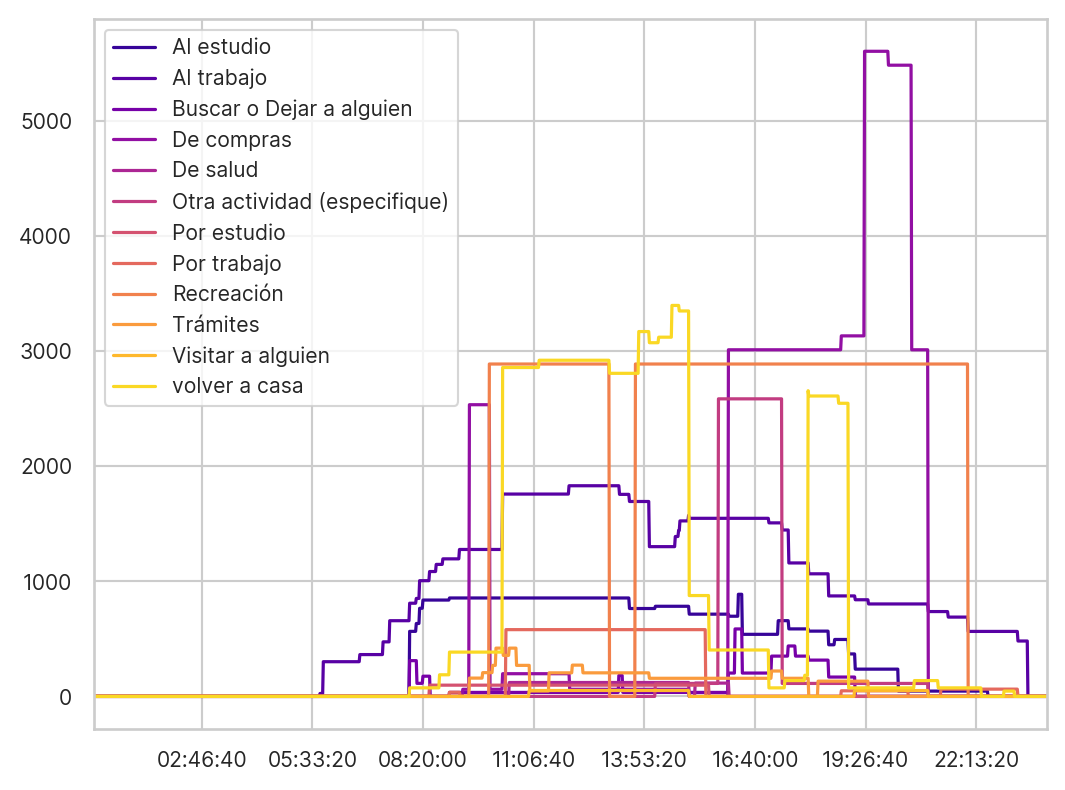

In [63]:
def calcular_matriz_de_tiempos(df):
    timeseries = pd.DataFrame(index=pd.timedelta_range(ejemplo['inicio_actividad'].min(), ejemplo['fin_actividad'].max(), freq='min'))
    for idx, group in df.groupby('Proposito'):
    
        group_ts = group.pipe(contar_minutos).groupby('minutos')['Peso'].sum().rename(idx)
        timeseries = timeseries.join(group_ts, how='left')

    return timeseries.fillna(0)

calcular_matriz_de_tiempos(ejemplo.head(100)).plot()

In [64]:
import numpy as np

matrices_de_tiempo = {}

for tipo_dia, group_tipo_dia in ejemplo.groupby('TipoDia'):

    # for idx, group in group_tipo_dia.groupby(np.arange(len(ejemplo)) // 1000):
    #     if idx == 0:
    #         matriz = group.pipe(calcular_matriz_de_tiempos)
    #     else:
    #         matriz += group.pipe(calcular_matriz_de_tiempos)
    #     #if idx > 5:
    #     #    break

    matriz = group_tipo_dia.pipe(calcular_matriz_de_tiempos).fillna(0)
    matrices_de_tiempo[tipo_dia] = matriz

matrices_de_tiempo

{'Domingo':                  Al estudio  Al trabajo  Buscar o Dejar a alguien  \
 0 days 00:05:00         0.0         0.0                       0.0   
 0 days 00:06:00         0.0         0.0                       0.0   
 0 days 00:07:00         0.0         0.0                       0.0   
 0 days 00:08:00         0.0         0.0                       0.0   
 0 days 00:09:00         0.0         0.0                       0.0   
 ...                     ...         ...                       ...   
 0 days 23:55:00         0.0         0.0                       0.0   
 0 days 23:56:00         0.0         0.0                       0.0   
 0 days 23:57:00         0.0         0.0                       0.0   
 0 days 23:58:00         0.0         0.0                       0.0   
 0 days 23:59:00         0.0         0.0                       0.0   
 
                  Buscar o dejar algo  Comer o Tomar algo  De compras  \
 0 days 00:05:00                  0.0                 0.0         0.0   
 

In [65]:
matrices_de_tiempo.keys()

dict_keys(['Domingo', 'FindesemanaEstival', 'Laboral', 'LaboralEstival', 'Sábado'])

<Axes: >

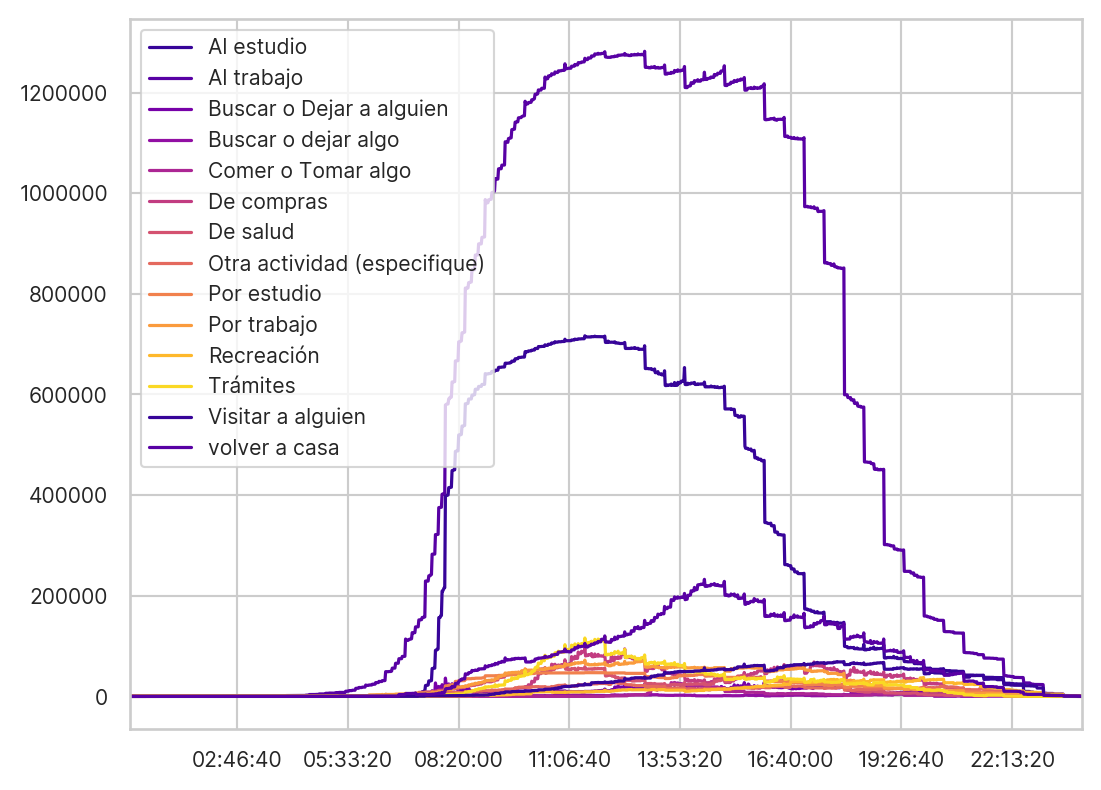

In [66]:
matrices_de_tiempo['Laboral'].plot()

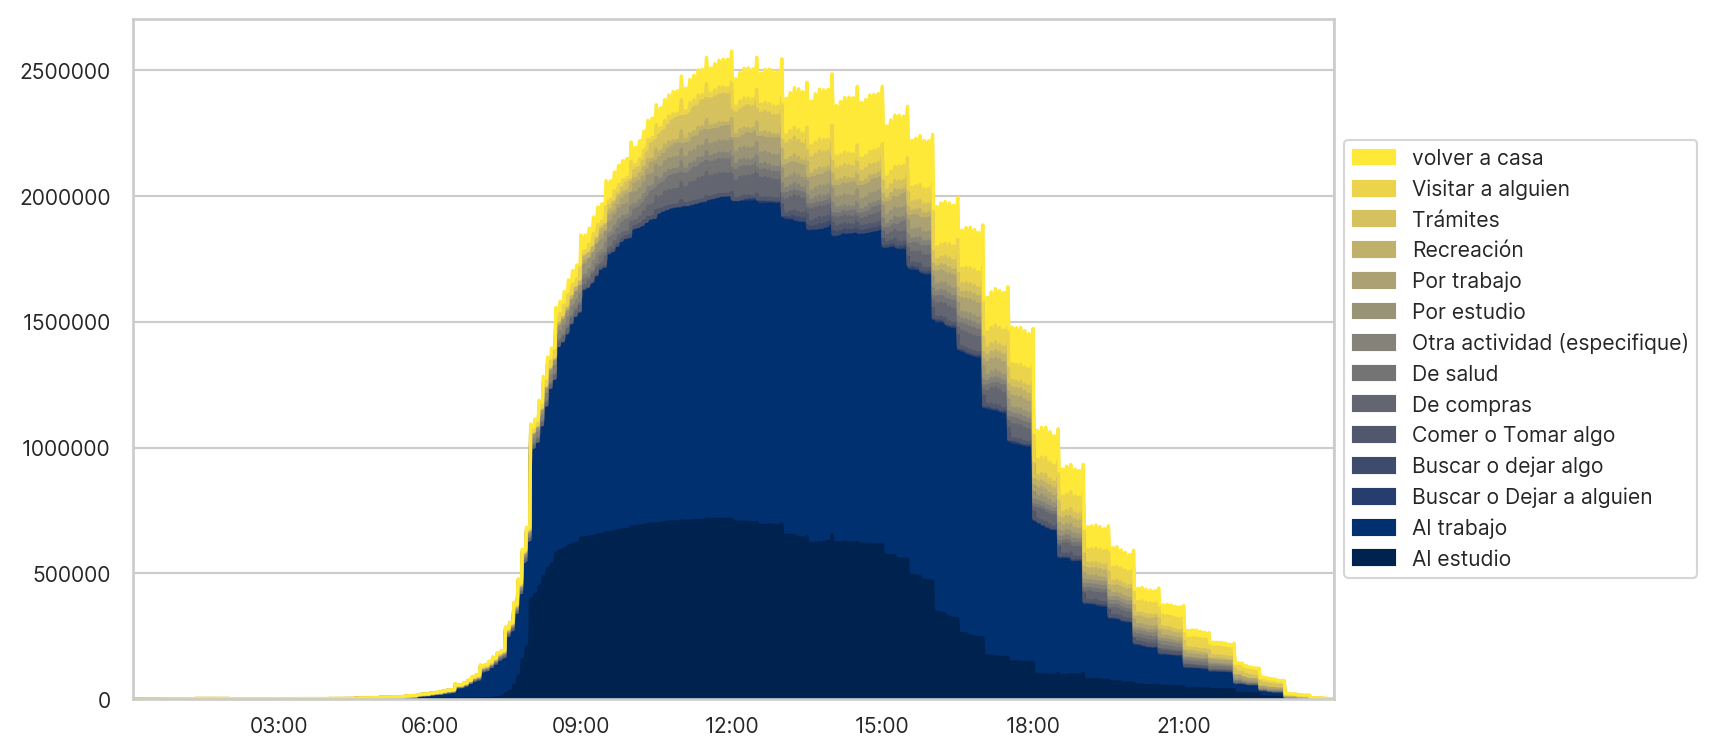

In [67]:
fig, ax = plt.subplots(figsize=(9, 4))

# un truco
matrices_de_tiempo['Laboral'].set_index(pd.to_datetime(matrices_de_tiempo['Laboral'].index.total_seconds(), unit='s')).plot(kind='area', stacked=True, cmap='cividis', ax=ax)

ax.legend(bbox_to_anchor=(1.0, 0.0, 0.1, 1.0), loc='center left', reverse=True)

fig.tight_layout()

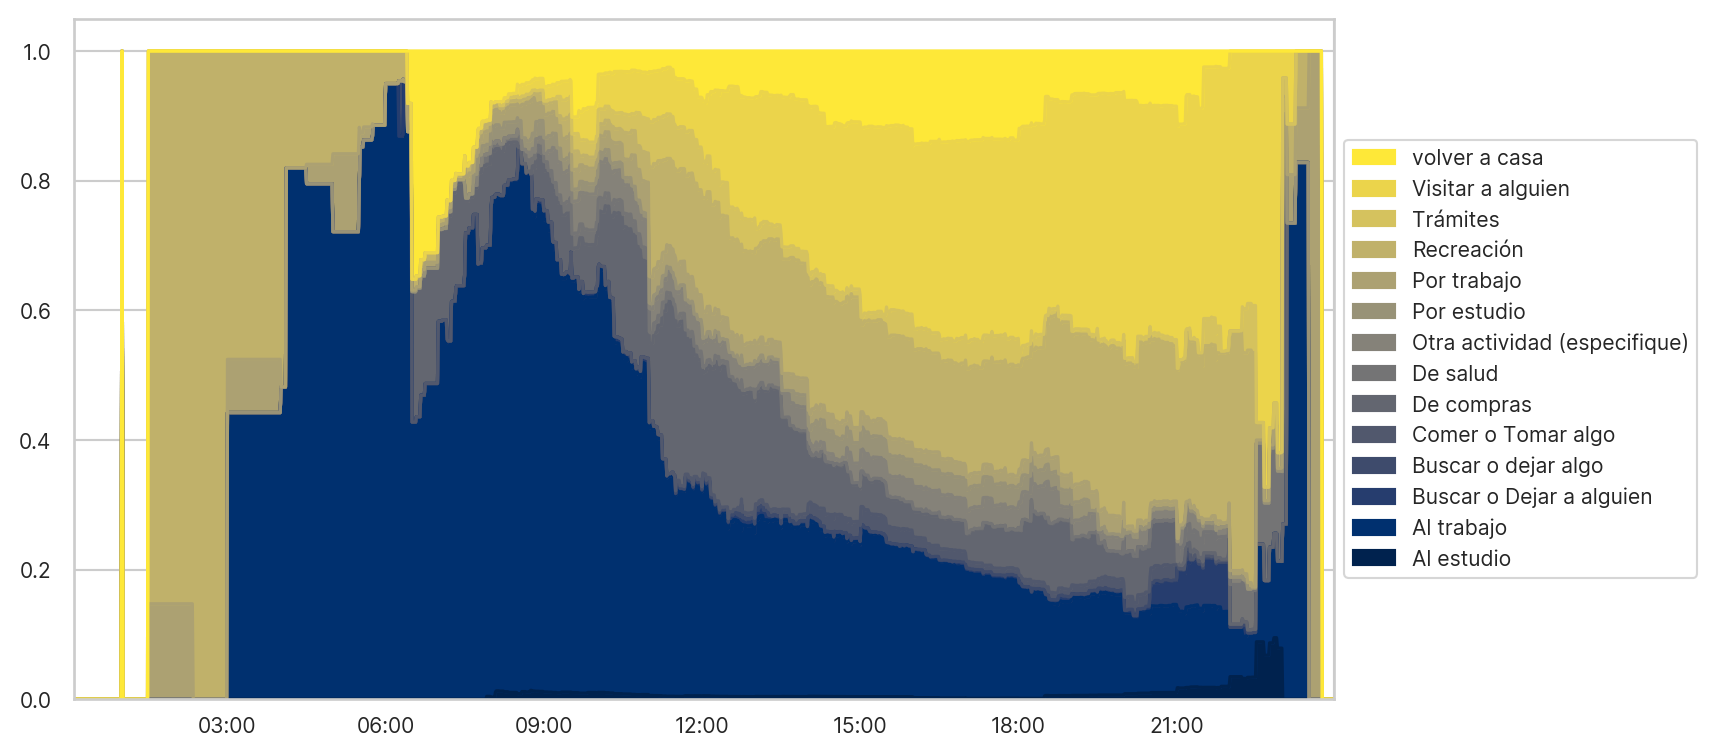

In [68]:
from aves.features.utils import normalize_rows

fig, ax = plt.subplots(figsize=(9, 4))

def plot_area(ax, df):
    # un truco
    df.set_index(pd.to_datetime(df.index.total_seconds(), unit='s')).pipe(normalize_rows).plot(kind='area', stacked=True, cmap='cividis', ax=ax)

plot_area(ax, matrices_de_tiempo['Domingo'])

ax.legend(bbox_to_anchor=(1.0, 0.0, 0.1, 1.0), loc='center left', reverse=True)

fig.tight_layout()

¡Es un buen comienzo! Sin embargo, todavía falta mucho por hacer. Algunas ideas:

- ¿Hay diferencias de género, edad y otros grupos?
- El gráfico no normalizado debiese tener siempre la misma cantidad de personas en cada instante del día. Entonces, ¿Cómo incluir a la gente que no realizó viajes? ¿Cómo incluir el antes y el después de los viajes? 

Las mejoras al gráfico de tipo estético y funcional las veremos en las siguientes clases.

## Sobre herramientas y Python

Con estas herramientas podemos explorar las relaciones que hay entre las variables de nuestro dataset. Concluimos que la mayor dificultad no está en _implementar_ las visualizaciones, sino en, primero, **saber qué preguntarle a los datos**, y segundo, **elegir los métodos adecuados para responder la pregunta**. Probablemente seaborn, pandas o matplotlib tienen dicha solución implementada, o al menos a unos pasos de ser implementada. También podemos utilizar los métodos implementados en aves.

El siguiente paso es entender cómo se comportan estos métodos con otras variables del dataset. También hemos probado distintos valores para atributos de apariencia, como los tamaños de figura y las paletas de colores.

Una dificultad en el aprendizaje es que no existen estándares para nombrar a los métodos y sus parámetros. Por ejemplo, el parámetro de la paleta de colores se suele llamar `cmap` en `matplotlib` y `pandas`, pero se llama `palette` en casi todos los métodos de `seaborn` --- digo casi todos porque algunos también usan `cmap`. Esto puede ser confuso para aprender, y creo que de momento no hay una solución más que ejercitar y aprenderse los nombres de parámetros y de métodos que sean más adecuados para la tarea a resolver.